# ***KURU FASÜLYE SINIFLANDIRMA PROBLEMİ ***
(MULTI-CLASS CLASSIFICATION OF DRY BEANS)

**BÖLÜM-1: VERİ ÖN İŞLEME (PREPROCESSING)**

In [5]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")


!pip install scikit-learn
from sklearn.metrics import mean_squared_error,r2_score


from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


In [6]:
df_=pd.read_excel("/content/drive/MyDrive/Dry_Bean_Dataset.xlsx")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=df_.copy()
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
df.shape

(13611, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
df.describe([0.25,0.5,0.7,0.8,0.85,0.9,0.95,0.99]).T

,count,mean,std,min,25%,50%,70%,80%,85%,90%,95%,99%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,55912.000000,67359.000000,72265.500000,78114.000000,89824.500000,186371.200000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,934.742000,1015.390000,1051.681500,1093.858000,1181.124000,1654.072900,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,363.802162,388.675385,401.151175,416.862854,448.323944,628.302071,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,207.439360,227.880576,236.528533,246.685824,267.885177,387.354168,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.666802,1.757906,1.830389,1.967724,2.082011,2.205338,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.800037,0.822435,0.837569,0.861238,0.877102,0.891284,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,56838.000000,68457.000000,73543.000000,79400.000000,91282.000000,188821.300000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,266.813361,292.855156,303.333632,315.369361,338.183538,487.129519,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.781866,0.791912,0.797546,0.803600,0.812253,0.826043,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.989650,0.990402,0.990827,0.991366,0.992027,0.993007,0.994677


In [12]:
df.duplicated().sum()

np.int64(68)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

'Area' ve 'Perimeter' kolonlarına % 5 oranında Missing Value eklendi.

In [15]:
for col in ['Area','Perimeter']:
    df.loc[df.sample(frac=0.05).index,col]=np.nan

'EquivDiameter' kolonuna %35 oranında Missing Value eklendi.

In [16]:
for col in ['EquivDiameter']:
    df.loc[df.sample(frac=0.35).index,col]=np.nan

In [17]:
df.isna().sum()

,0
Area,677
Perimeter,677
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,4740
Extent,0
Solidity,0


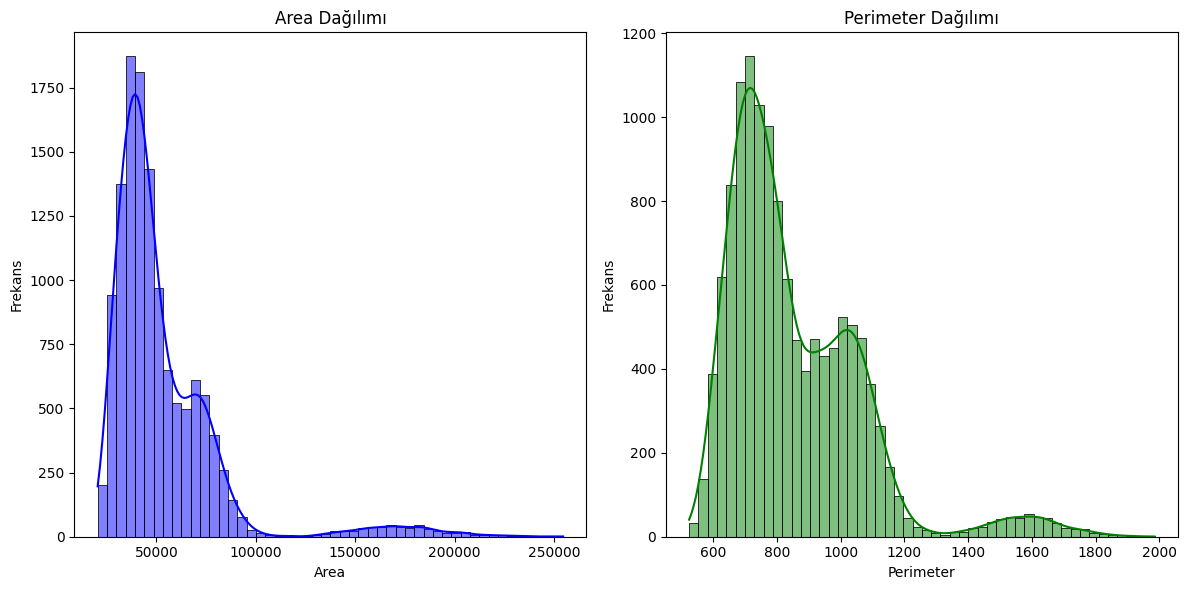

In [18]:
plt.figure(figsize=(12, 6))

# Area dağılımı
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
sns.histplot(df['Area'], bins=50, kde=True, color='blue')
plt.title('Area Dağılımı')
plt.xlabel('Area')
plt.ylabel('Frekans')

# Perimeter dağılımı
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
sns.histplot(df['Perimeter'], bins=50, kde=True, color='green')
plt.title('Perimeter Dağılımı')
plt.xlabel('Perimeter')
plt.ylabel('Frekans')

plt.tight_layout()  # Grafiklerin birbirine girmesini önler
plt.show()

Her iki değişken dağılımı da sağa çarpıktır. Aykırı değerlerin (outliers) ve çarpıklığın ortalamayı yanıltıcı şekilde etkilemesinden dolayı mean ile değil medyan ile doldurmayı tercih etmek daha doğru bir yaklaşımdır.

In [19]:
for col in ['Area', 'Perimeter']:
    median_value = df[col].median()  # Sütunun medyanını hesapla
    df[col].fillna(median_value, inplace=True)  # NaN'leri medyan ile doldur

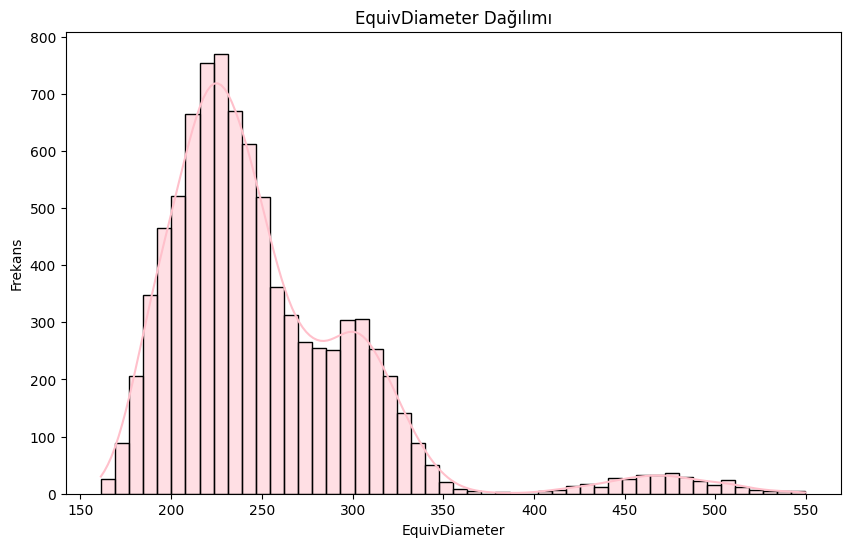

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['EquivDiameter'], bins=50, kde=True,color='pink')
plt.title('EquivDiameter Dağılımı')
plt.xlabel('EquivDiameter')
plt.ylabel('Frekans')
plt.show()

In [21]:
df['EquivDiameter'] = df.groupby('Class')['EquivDiameter'].transform(
    lambda x: x.fillna(x.median()))

In [22]:
df.isna().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


***AYKIRI DEĞER ANALİZİ - OUTLIER ANALYSIS ***

IQR yöntemiyle outlier olan gözlemler belirlendi ve sınır değerlerine baskılandı.

In [23]:
def iqr_outlier_capping_all(df, plot=False):


    num_cols = df.select_dtypes(include='number').columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"'{col}': {outlier_count} outlier baskılanacak.")

        if plot:
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=df[col], color="skyblue")
            plt.title(f"{col} - Before Capping")
            plt.show()

        # Capping işlemi
        df[col] = df[col].clip(lower, upper)

        if plot:
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=df[col], color="lightgreen")
            plt.title(f"{col} - After Capping")
            plt.show()

    print("\n✅ Tüm sayısal kolonlar için baskılama tamamlandı.")
    return df

'Area': 558 outlier baskılanacak.


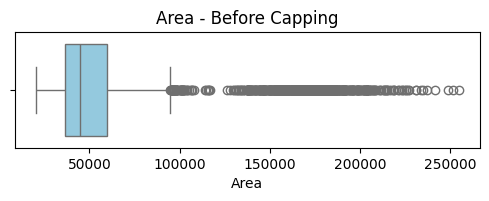

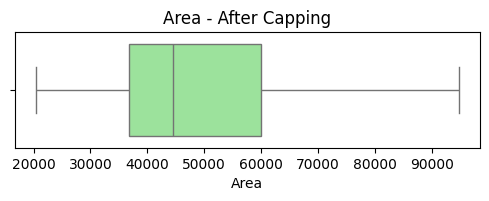

'Perimeter': 493 outlier baskılanacak.


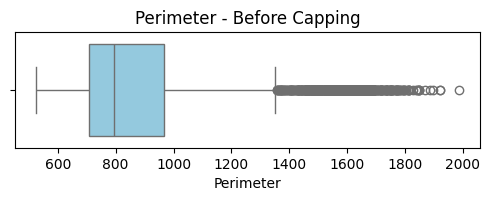

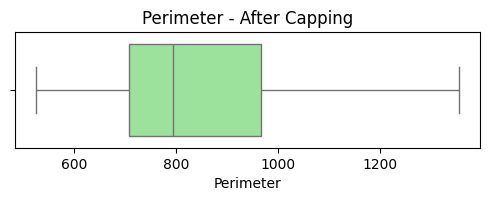

'MajorAxisLength': 379 outlier baskılanacak.


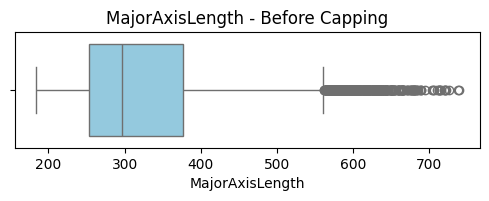

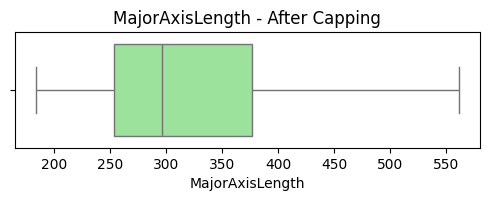

'MinorAxisLength': 567 outlier baskılanacak.


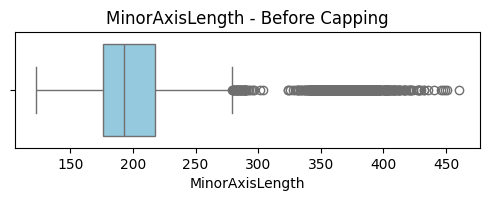

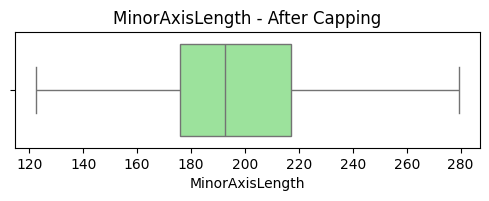

'AspectRation': 485 outlier baskılanacak.


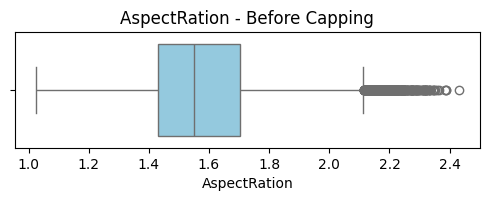

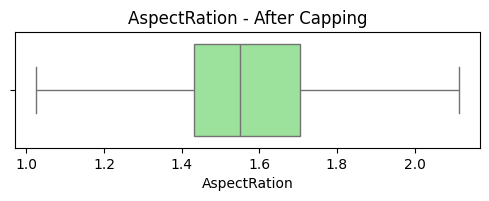

'Eccentricity': 833 outlier baskılanacak.


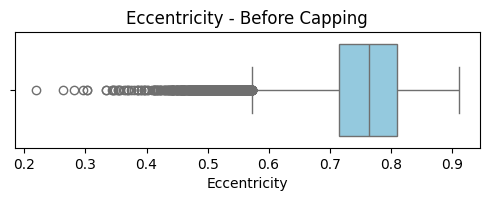

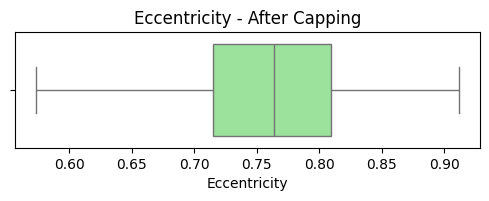

'ConvexArea': 549 outlier baskılanacak.


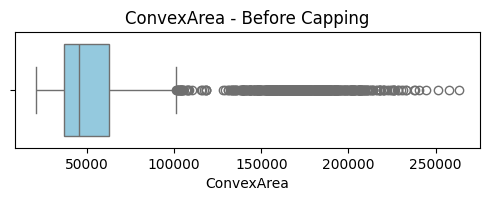

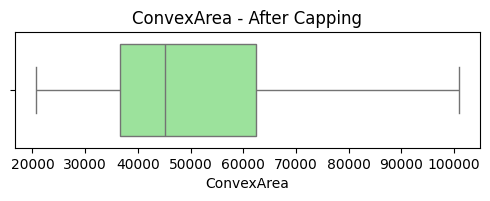

'EquivDiameter': 525 outlier baskılanacak.


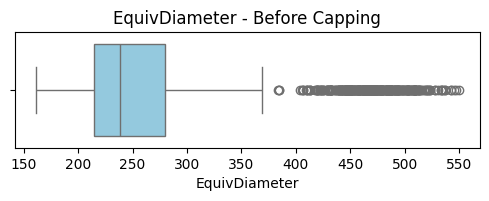

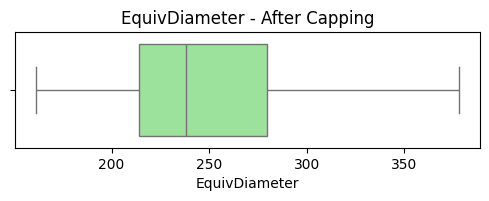

'Extent': 271 outlier baskılanacak.


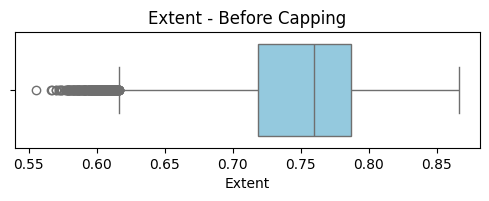

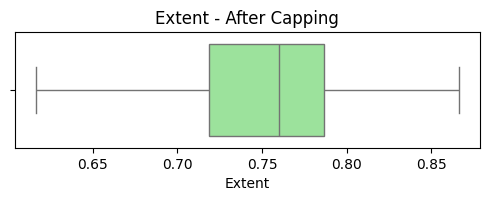

'Solidity': 774 outlier baskılanacak.


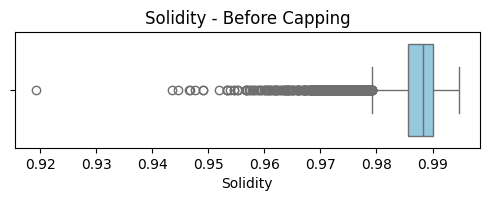

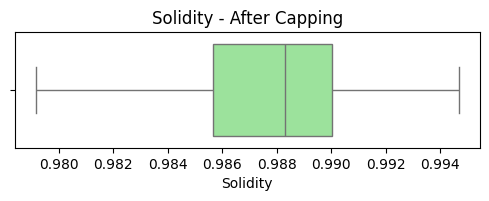

'roundness': 98 outlier baskılanacak.


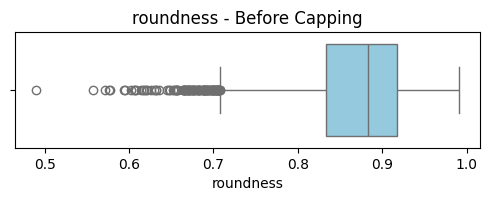

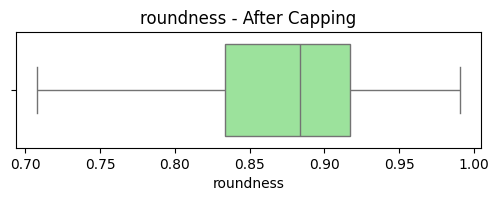

'Compactness': 124 outlier baskılanacak.


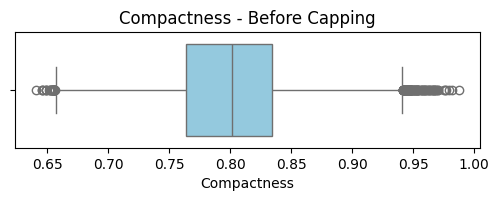

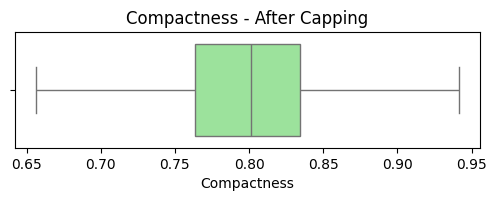

'ShapeFactor1': 533 outlier baskılanacak.


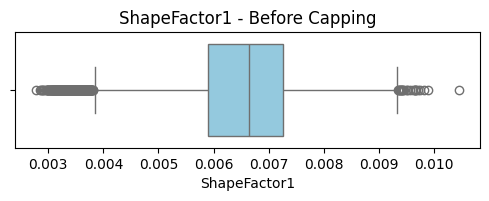

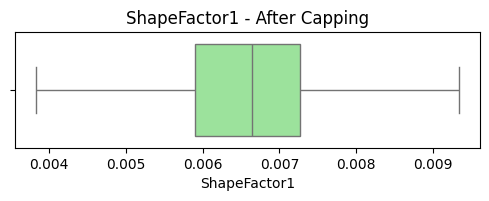

'ShapeFactor2': 0 outlier baskılanacak.


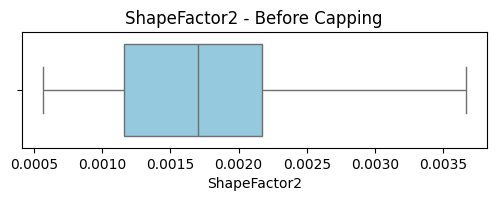

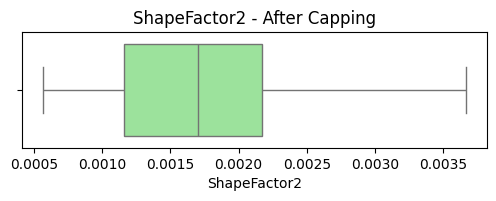

'ShapeFactor3': 202 outlier baskılanacak.


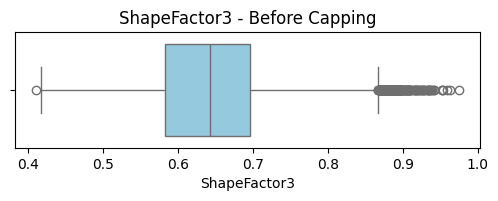

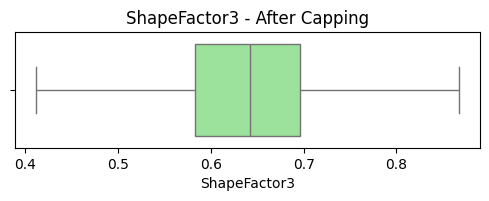

'ShapeFactor4': 760 outlier baskılanacak.


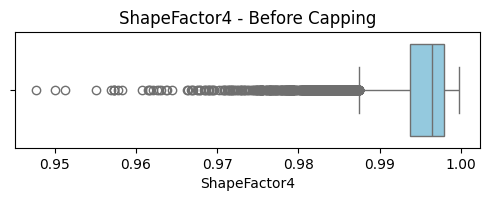

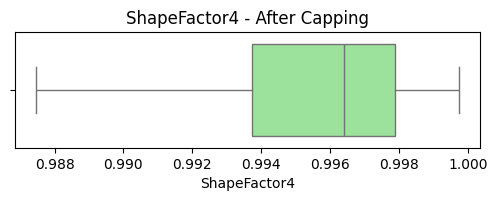


✅ Tüm sayısal kolonlar için baskılama tamamlandı.


In [24]:
df = iqr_outlier_capping_all(df, plot=True)

**ÖLÇEKLEME İŞLEMİ**

In [25]:
# 1. Veriyi yükle
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("X_scaled boyut:", X_scaled.shape)
print("y_encoded boyut:", y_encoded.shape)

X_scaled boyut: (13543, 16)
y_encoded boyut: (13543,)


Hedef değişken birden fazla sınıfa sahip olduğu için Label Encoding yapıldı. Sayısal öznitelikler ise aynı ölçeğe gelmesi için Scaling işleminden geçirildi.

Ölçekleme, özellikleri aynı ölçeğe getirir.
Her özelliği ortalama=0 ve standart sapma=1 olacak şekilde dönüştürür.
PCA öncesi StandardScaler kullanmak, bileşenlerin gerçek varyansı yansıtmasını sağlar.PCA, kovaryans matrisini kullanır. StandardScaler, kovaryans matrisinin doğru hesaplanmasını sağlar.
Ölçeklenmemiş veride, PCA bileşenleri yanlış özelliklere odaklanabilir.Bu sebeple scaling işlemi yapıyoruz ve yine bahsettiğim sebeplerden dolayı da StandardScaler kullanıldı.

**PCA(Principal Compenent Analysis) İLE BOYUT İNDİRGEME**

In [26]:
pca_full = PCA().fit(X_scaled)

# Explained variance oranlarını hesapla
explained_variance = pca_full.explained_variance_ratio_

# Ortalamanın üzerindeki bileşenleri seç
n_components = sum(explained_variance > np.mean(explained_variance))
print(f"Seçilen bileşen sayısı: {n_components}")
print(f"Bileşenlerin açıkladığı toplam varyans: {sum(explained_variance[:n_components]):.2%}")

Seçilen bileşen sayısı: 3
Bileşenlerin açıkladığı toplam varyans: 89.72%


Orijinal veri setindeki değişkenler PCA ile 3 temel bileşene indirgendi ve bu bileşenler toplam varyansın %89.70'ni açıklıyor. Bu, verideki ana kalıpların büyük ölçüde korunduğunu gösteriyor. Özellikle ilk iki bileşen (toplam ~%80 varyans) baskın etkiye sahipken, üçüncü bileşen ek bilgi sağlıyor diyebiliriz.

In [27]:
# PCA'yı seçilen bileşen sayısıyla uygula
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# PCA uygulanmış veriyi DataFrame'e çevir
pca_columns = [f"PC_{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)
pca_df['Class'] = y_encoded  # Hedef değişkeni ekle

# Sonuçları göster
print("\nPCA uygulanmış veri (ilk 5 satır):")
print(pca_df.head())


PCA uygulanmış veri (ilk 5 satır):
       PC_1      PC_2      PC_3  Class
0  5.406434 -1.418442 -0.814344      5
1  5.077299 -2.078703 -2.121181      5
2  5.024653 -1.638408 -0.481999      5
3  3.977720 -1.872552 -3.607727      5
4  5.780441 -2.733514 -0.493545      5


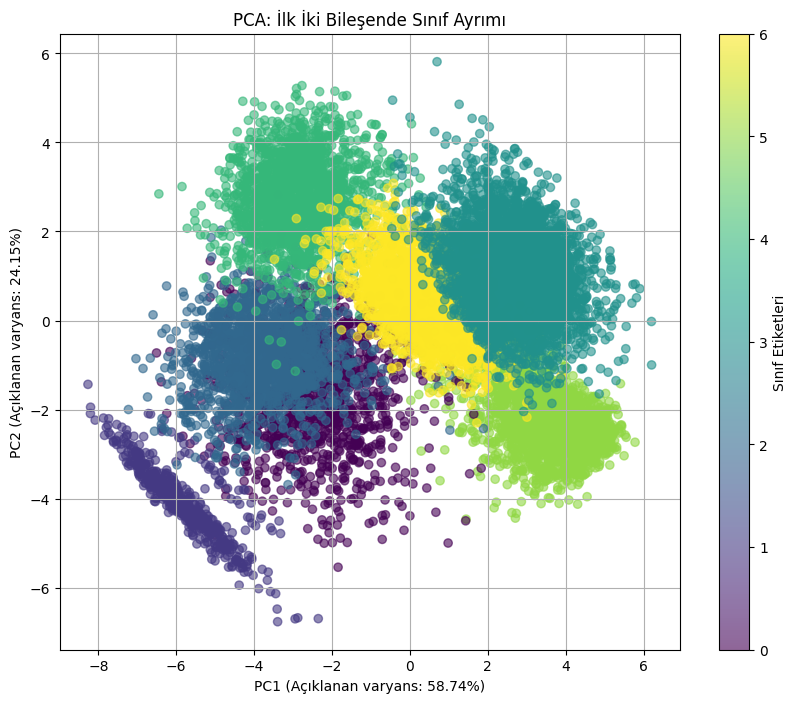

In [28]:
# İlk 2 bileşen için PCA uygula (görselleştirme amaçlı)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# 2B grafik oluştur
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 (Açıklanan varyans: {pca_2d.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (Açıklanan varyans: {pca_2d.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: İlk İki Bileşende Sınıf Ayrımı')
plt.colorbar(scatter, label='Sınıf Etiketleri')
plt.grid()
plt.show()

In [29]:

# PCA modeli
pca = PCA(n_components=3)
pca.fit(X_scaled)  # X_scaled: Ölçeklendirilmiş veri

# Bileşen yükleri
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)
print(loadings)

# Hangi değişkenler PC1'e en çok katkı yapıyor?
print("PC1 için önemli değişkenler:", loadings['PC1'].abs().nlargest(3).index.tolist())
print("PC2 için önemli değişkenler:", loadings['PC2'].abs().nlargest(3).index.tolist())
print("PC3 için önemli değişkenler:", loadings['PC3'].abs().nlargest(3).index.tolist())

                      PC1       PC2       PC3
Area            -0.285041 -0.216368  0.045618
Perimeter       -0.295093 -0.181842  0.029088
MajorAxisLength -0.311392 -0.106801  0.123346
MinorAxisLength -0.216114 -0.375344 -0.028207
AspectRation    -0.237680  0.327420  0.173119
Eccentricity    -0.240497  0.321283  0.153846
ConvexArea      -0.290949 -0.222244  0.043302
EquivDiameter   -0.289344 -0.214496  0.049531
Extent           0.064773 -0.225288  0.244626
Solidity         0.158558 -0.071910  0.772343
roundness        0.260553 -0.180193  0.219569
Compactness      0.243563 -0.326166 -0.155582
ShapeFactor1     0.207578  0.381165 -0.009353
ShapeFactor2     0.312073 -0.102318 -0.143849
ShapeFactor3     0.244056 -0.325056 -0.152967
ShapeFactor4     0.220706 -0.076195  0.387486
PC1 için önemli değişkenler: ['ShapeFactor2', 'MajorAxisLength', 'Perimeter']
PC2 için önemli değişkenler: ['ShapeFactor1', 'MinorAxisLength', 'AspectRation']
PC3 için önemli değişkenler: ['Solidity', 'ShapeFactor4', '

Her bir bileşene en çok etki eden(en yüksek korelasyona sahip) öznitelikler belirlendi.

 **LDA(Linear Discriminant Analysis) İLE BOYUT İNDİRGEME**

In [30]:
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_encoded)


lda_df = pd.DataFrame(X_lda, columns=[f"LDA_{i+1}" for i in range(3)])
lda_df['Class'] = y_encoded

print("\nLDA uygulanmış veri (ilk 5 satır):")
print(lda_df.head())


LDA uygulanmış veri (ilk 5 satır):
      LDA_1     LDA_2     LDA_3  Class
0  3.573226 -4.064581 -0.041866      5
1  0.970907 -2.227342  3.082249      5
2  2.102313 -2.211735  0.756433      5
3  1.579527 -1.476440  1.214372      5
4  2.719409 -2.532184  3.993434      5


In [31]:
# LDA modeli
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, y)  # X: Öznitelikler, y: Sınıf etiketleri


lda_components = lda.scalings_[:, :3]

# Katsayı matrisi (özniteliklerin bileşenlere ağırlıkları)
coef_df = pd.DataFrame(lda_components, index=X.columns, columns=['LDA1', 'LDA2', 'LDA3'])
print(coef_df)

# En önemli öznitelikler (mutlak değerce büyük olanlar)
print("LDA1 için önemli öznitelikler:", coef_df['LDA1'].abs().nlargest(3).index.tolist())
print("LDA2 için önemli öznitelikler:", coef_df['LDA2'].abs().nlargest(3).index.tolist())
print("LDA3 için önemli öznitelikler:", coef_df['LDA3'].abs().nlargest(3).index.tolist())

                        LDA1         LDA2          LDA3
Area                0.000012     0.000010  8.128861e-07
Perimeter          -0.000859    -0.000513 -2.820695e-04
MajorAxisLength    -0.234736    -0.128319 -5.859678e-02
MinorAxisLength    -0.064020     0.017402  4.788810e-02
AspectRation        3.300127    13.597145 -2.302854e+01
Eccentricity       -1.748406     1.931846  1.234170e+01
ConvexArea          0.000574     0.000253  1.332290e-04
EquivDiameter      -0.046116     0.054985  2.380777e-02
Extent             -1.015391     0.826677  1.837746e+00
Solidity           67.934928     7.316954 -3.969769e+01
roundness          -1.481276    -8.172238 -6.102057e+00
Compactness      -312.113738  -146.518013 -9.142069e+01
ShapeFactor1    -5011.792167 -1885.341081 -4.291706e+02
ShapeFactor2     2345.260907  1684.345557  2.308808e+03
ShapeFactor3      120.218933    69.287871 -7.602464e-01
ShapeFactor4        0.605736   -59.841678  1.496916e+02
LDA1 için önemli öznitelikler: ['ShapeFactor1', 

İlk 3 doğrusal ayırıcı bileşene etki eden 3 öznitelik belirlenmiştir.

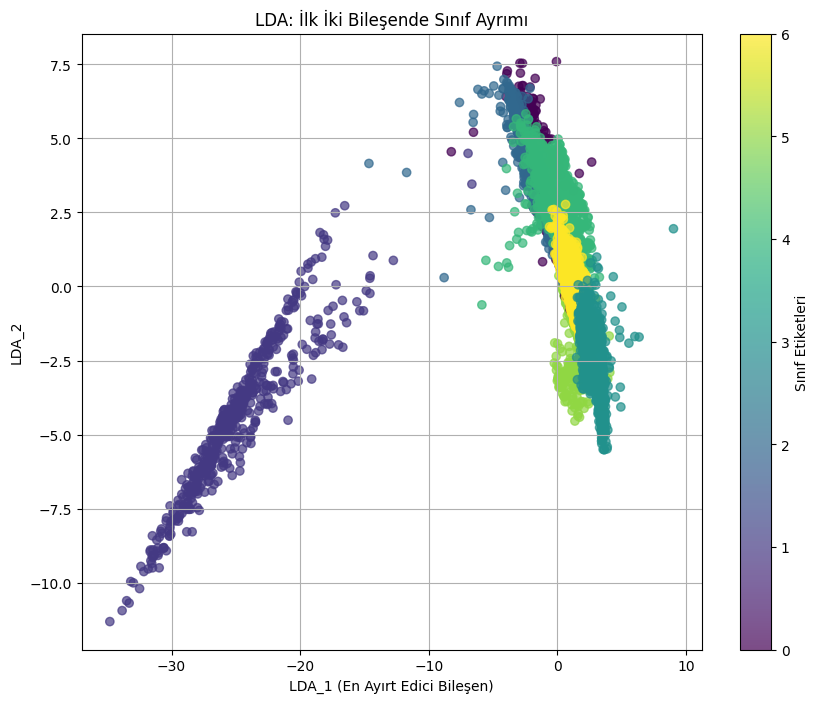

In [32]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel('LDA_1 (En Ayırt Edici Bileşen)')
plt.ylabel('LDA_2')
plt.title('LDA: İlk İki Bileşende Sınıf Ayrımı')
plt.colorbar(scatter, label='Sınıf Etiketleri')
plt.grid(True)
plt.show()

In [33]:
# LDA'nın sınıflar arası ayrıştırma gücü
print("\nLDA Bileşenlerinin Açıkladığı Varyans Oranı:")
explained_variance_ratio = lda.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"LDA_{i+1}: {ratio:.2%}")


LDA Bileşenlerinin Açıkladığı Varyans Oranı:
LDA_1: 62.96%
LDA_2: 17.97%
LDA_3: 8.70%


LDA, PCA'den farklı olarak sınıf bilgisini kullanarak (supervised) boyut indirgeme yapar.

Görselleştirme, sınıfların LDA bileşenlerinde ne kadar iyi ayrıştığını gösterir.

explained_variance_ratio, her bileşenin sınıflar arası ayrımı ne kadar iyi açıkladığını gösterir.

**BÖLÜM 3: MODELLEME VE DEĞERLENDİRME**

Dış döngü (outer): Modelin performans değerlendirmesi için kullanılır.

İç döngü (inner): Hiperparametre optimizasyonu içindir. Farklı bir random state (123) kullanarak, dış döngüden bağımsız bir veri bölünmesi yapılır. Bu, optimizasyonun daha güvenilir olmasını sağlar.

Stratified K-Fold Sınıf dağılımını koruyarak bölme yapar. Bu özellikle dengesiz veri setlerinde önemlidir.

Shuffle=True: Veriyi karıştırarak rastgeleliği artırır

Dış: 5-fold → Model performansını daha güvenilir ölçmek için.

İç: 3-fold → Hiperparametre optimizasyonunda hesaplama maliyetini düşürmek için

Nested CV'de dış döngünün(Outer Loop)amacı: Modelin genelleme performansını ölçmektir.
Veriyi 5 parçaya böler, her iterasyonda 4 parça eğitim + 1 parça test.

İç döngünün amacı; Hiperparametre optimizasyonu.
Dış döngünün eğitim verisini 3-fold ile tekrar böler ve en iyi parametreleri seçer.

Performans metriklerinde F1 macro alınmasının sebebi dengesiz sınıf dağılımıdır. Tüm sınıfları eşit ağırlıkta değerlendirir.

Performans Metrikleri ve Karmaşıklık Matrisi Sonuçlarına Göre;

EN İYİ MODEL
Veri Tipi: Ham Veri
Model: XGBoost
Ortalama Accuracy: 0.9490
Ortalama F1 (macro): 0.9564
En İyi Parametreler: {'learning_rate': 0.1, 'n_estimators': 100} olarak belirlenmiştir.


🔍 Ham Veri - Logistic Regression değerlendiriliyor...


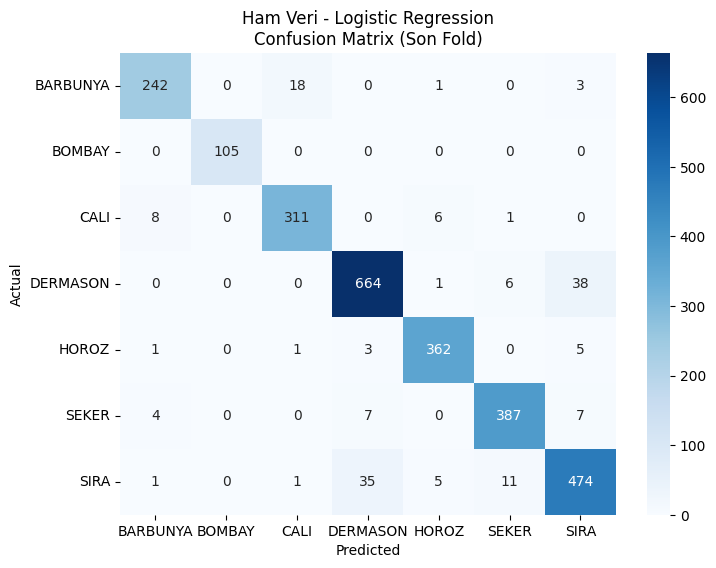


🔍 Ham Veri - Decision Tree değerlendiriliyor...


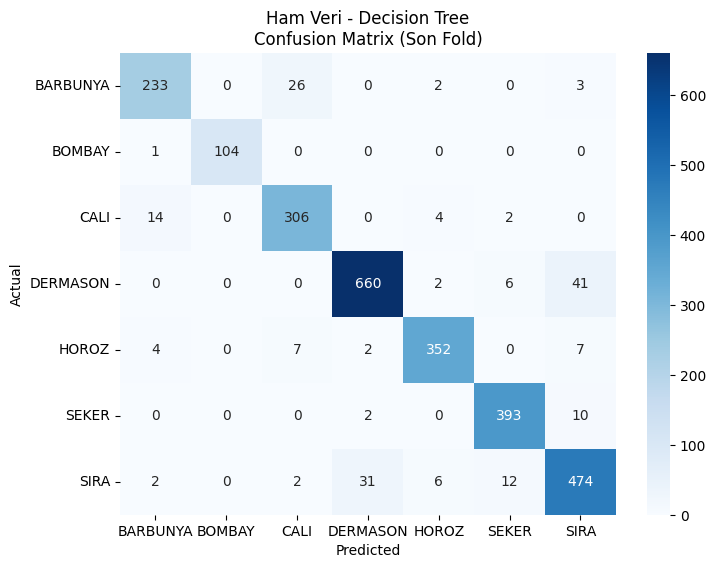


🔍 Ham Veri - Random Forest değerlendiriliyor...


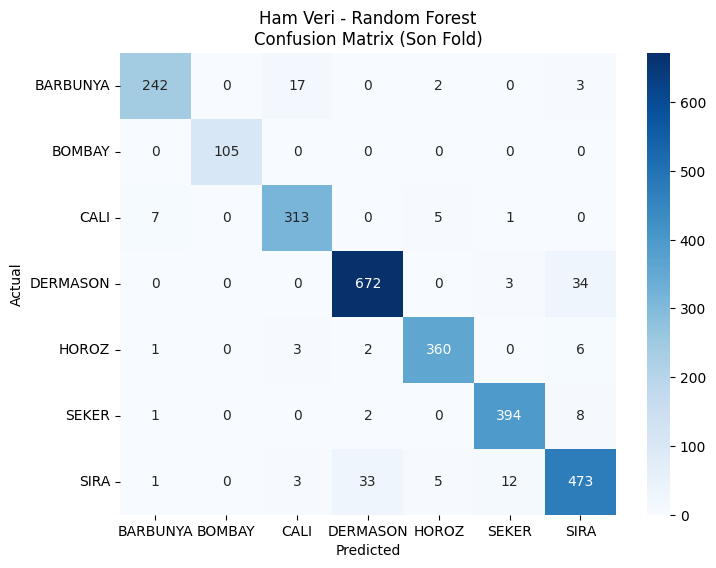


🔍 Ham Veri - XGBoost değerlendiriliyor...


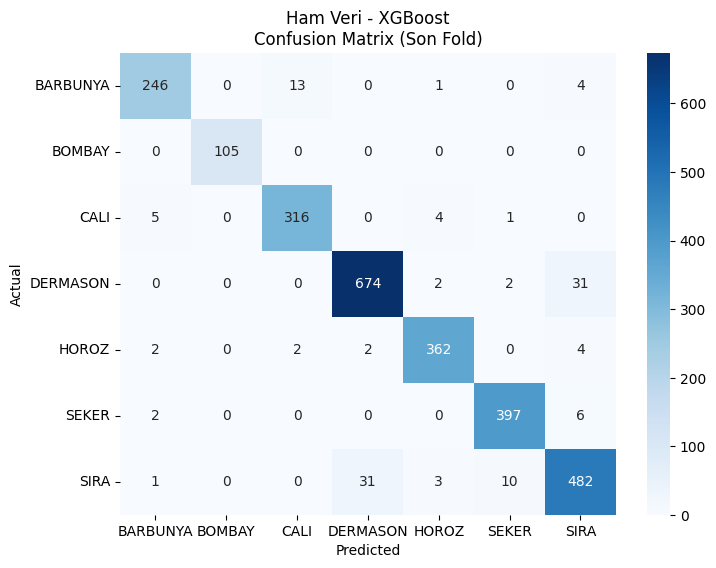


🔍 Ham Veri - Naive Bayes değerlendiriliyor...


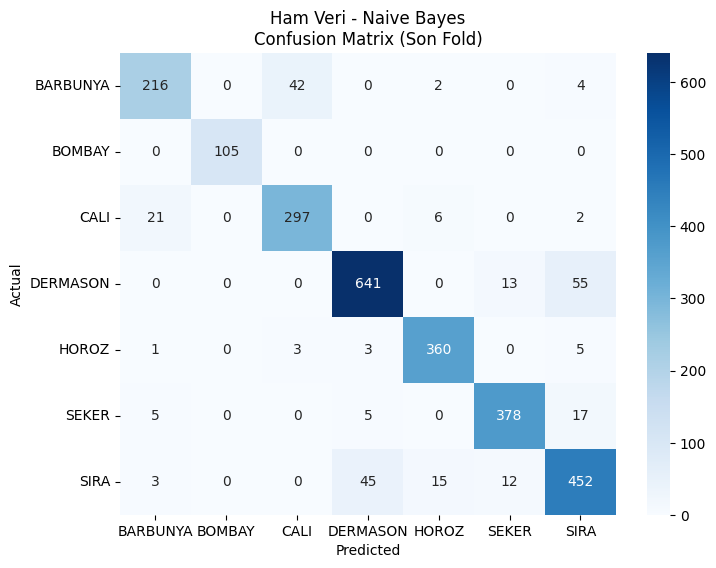


🔍 PCA Veri - Logistic Regression değerlendiriliyor...


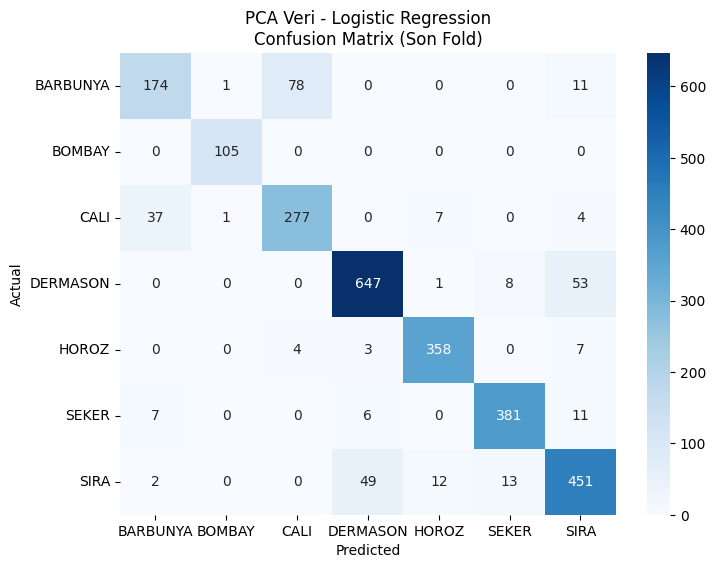


🔍 PCA Veri - Decision Tree değerlendiriliyor...


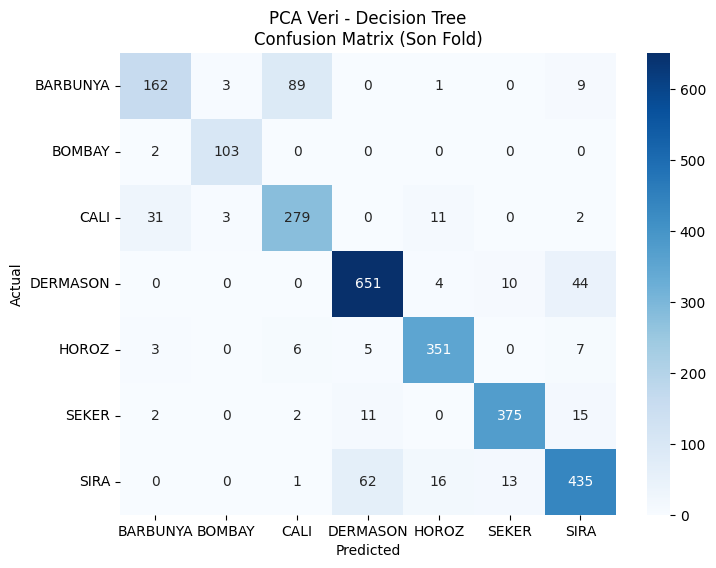


🔍 PCA Veri - Random Forest değerlendiriliyor...


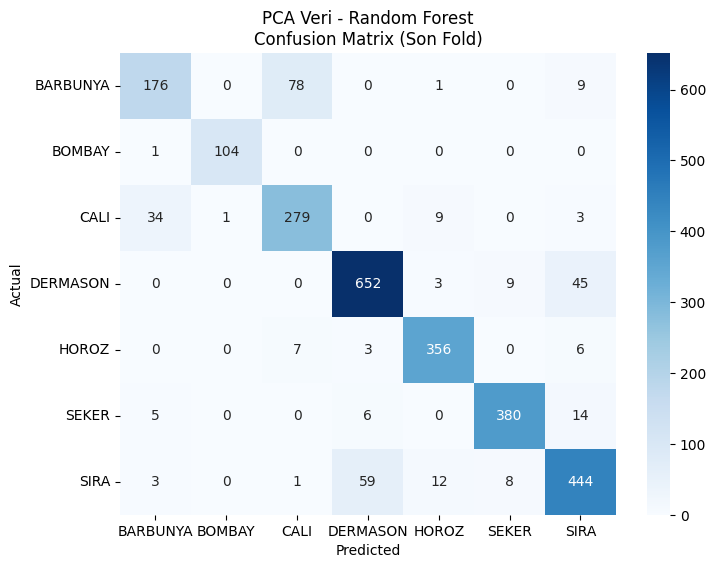


🔍 PCA Veri - XGBoost değerlendiriliyor...


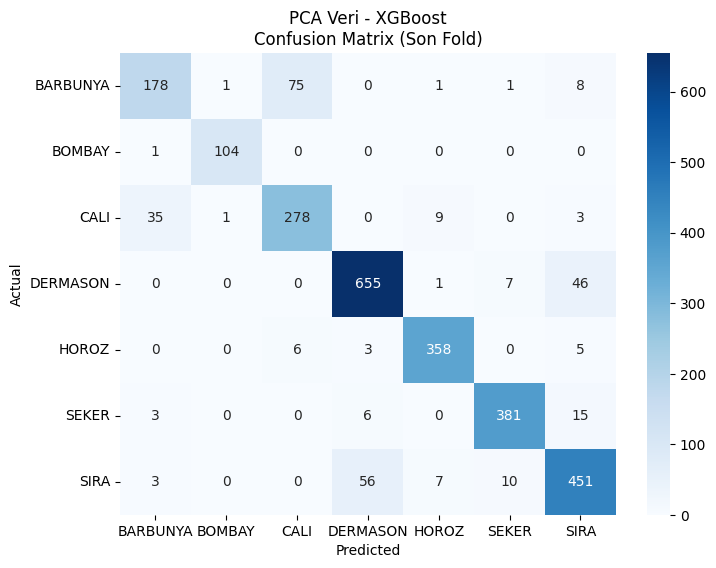


🔍 PCA Veri - Naive Bayes değerlendiriliyor...


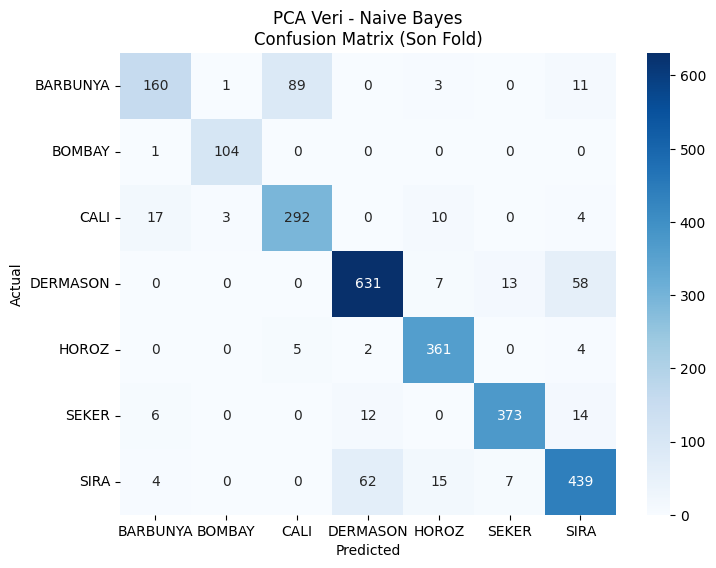


🔍 LDA Veri - Logistic Regression değerlendiriliyor...


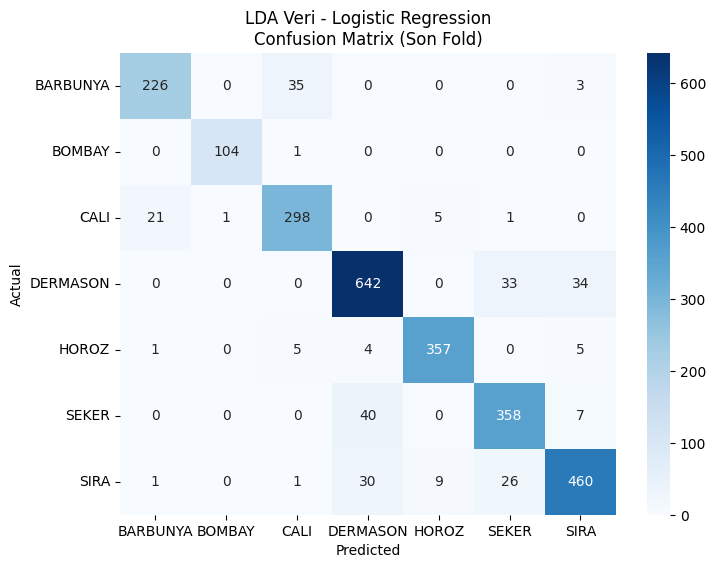


🔍 LDA Veri - Decision Tree değerlendiriliyor...


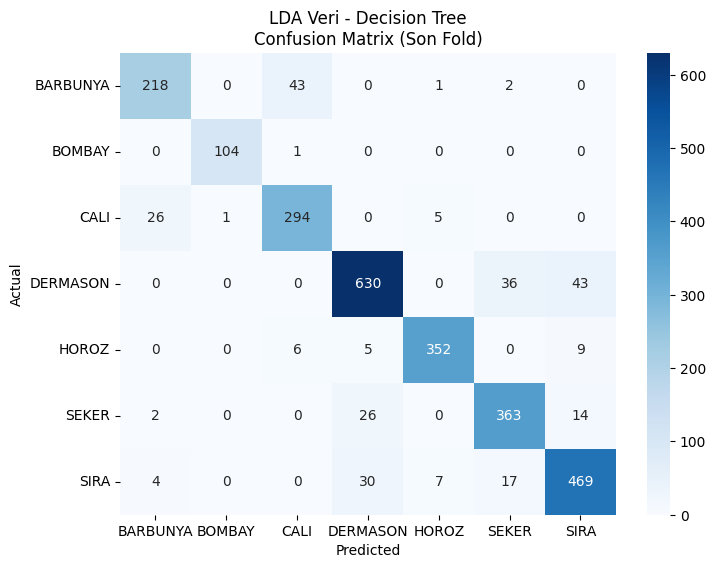


🔍 LDA Veri - Random Forest değerlendiriliyor...


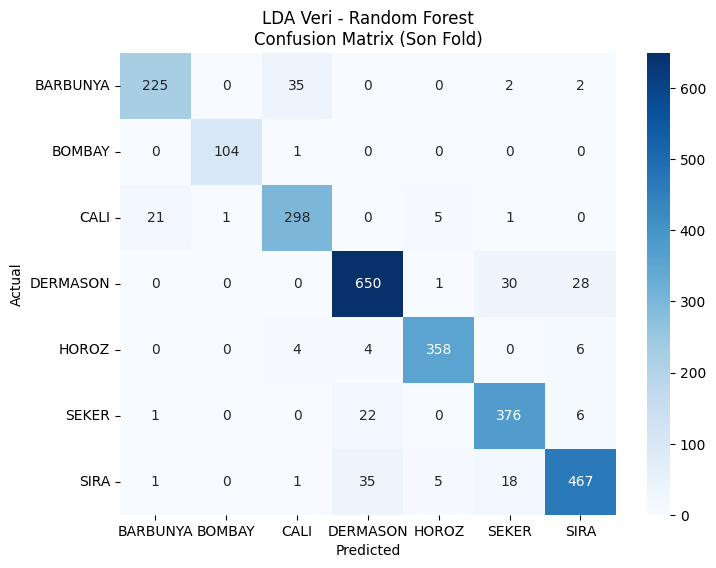


🔍 LDA Veri - XGBoost değerlendiriliyor...


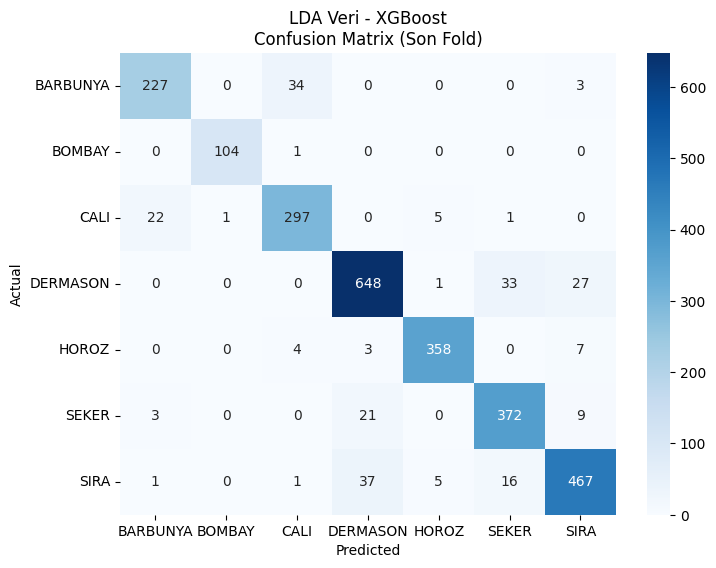


🔍 LDA Veri - Naive Bayes değerlendiriliyor...


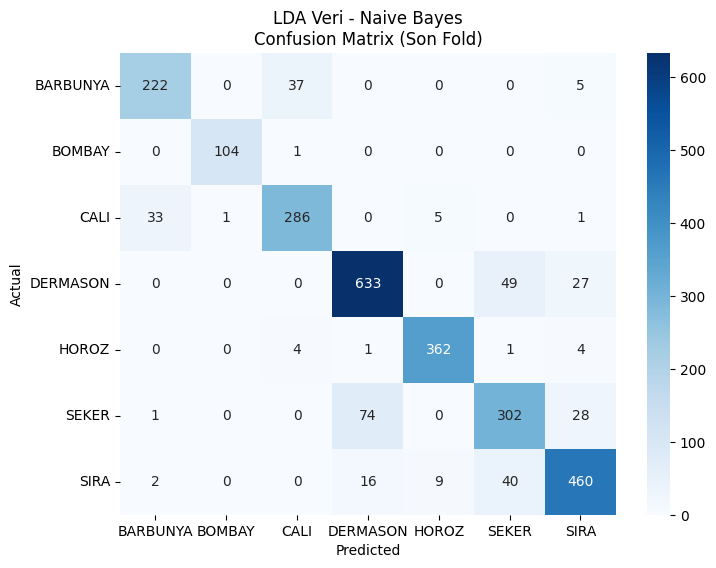


🏆 EN İYİ PERFORMANSLAR:
                              Accuracy  Precision    Recall  F1_weighted  \
Data     Model                                                             
Ham Veri XGBoost              0.948978   0.949122  0.948978     0.948988   
         Random Forest        0.943735   0.943796  0.943735     0.943679   
         Logistic Regression  0.942627   0.942976  0.942627     0.942713   
         Decision Tree        0.931552   0.932176  0.931552     0.931656   
LDA Veri Random Forest        0.912576   0.913103  0.912576     0.912646   
         XGBoost              0.911689   0.912112  0.911689     0.911779   
Ham Veri Naive Bayes          0.909991   0.910902  0.909991     0.910072   
LDA Veri Logistic Regression  0.902459   0.902874  0.902459     0.902540   
         Decision Tree        0.898251   0.898604  0.898251     0.898256   
PCA Veri XGBoost              0.890202   0.890187  0.890202     0.889533   
         Random Forest        0.890201   0.890273  0.890201    

In [34]:

# X_scaled: Ham veri (StandardScaler uygulanmış)
# X_pca: PCA dönüştürülmüş veri
# X_lda: LDA dönüştürülmüş veri (n_components=3)
# y_encoded: Label encoded hedef değişken


random_states = {
    'outer': 42,
    'inner': 43
}

cv_settings = {
    'outer_cv': StratifiedKFold(n_splits=5, shuffle=True, random_state=random_states['outer']),
    'inner_cv': StratifiedKFold(n_splits=3, shuffle=True, random_state=random_states['inner'])
}


models_config = {
    "Logistic Regression": {
        "model": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
        "params": {'C': [0.1, 1, 10], 'penalty': ['l2']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {'n_estimators': [50, 100], 'max_depth': [None, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]}
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    }
}

data_types = {
    "Ham Veri": X_scaled,
    "PCA Veri": X_pca,
    "LDA Veri": X_lda
}


def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'F1_macro': f1_score(y_true, y_pred, average='macro')
    }

# NESTED CV UYGULAMA

results = []

for data_name, X_data in data_types.items():
    for model_name, config in models_config.items():
        print(f"\n🔍 {data_name} - {model_name} değerlendiriliyor...")

        # Model pipeline
        model = config["model"]
        params = config["params"]


        grid = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=cv_settings['inner_cv'],
            scoring='accuracy',
            n_jobs=-1
        )

        # Dış döngü
        fold_results = []
        for fold, (train_idx, test_idx) in enumerate(cv_settings['outer_cv'].split(X_data, y_encoded)):
            X_train, X_test = X_data[train_idx], X_data[test_idx]
            y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]


            grid.fit(X_train, y_train)
            y_pred = grid.predict(X_test)


            metrics = calculate_metrics(y_test, y_pred)
            metrics.update({
                'Data': data_name,
                'Model': model_name,
                'Fold': fold + 1,
                'Best_Params': str(grid.best_params_)
            })
            fold_results.append(metrics)

            # Son fold için confusion matrix
            if fold == cv_settings['outer_cv'].n_splits - 1:
                cm = confusion_matrix(y_test, y_pred)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=le.classes_,
                            yticklabels=le.classes_)
                plt.title(f'{data_name} - {model_name}\nConfusion Matrix (Son Fold)')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

        # Ortalama metrikler
        avg_metrics = pd.DataFrame(fold_results).mean(numeric_only=True).to_dict()
        avg_metrics.update({
            'Data': data_name,
            'Model': model_name,
            'Best_Params': fold_results[-1]['Best_Params']
        })
        results.append(avg_metrics)


results_df = pd.DataFrame(results)


print("\n🏆 EN İYİ PERFORMANSLAR:")
final_results = results_df.groupby(['Data', 'Model']).agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1_weighted': 'mean',
    'F1_macro': 'mean'
}).sort_values(by='F1_weighted', ascending=False)

pd.set_option('display.max_columns', None)
print(final_results)


best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n⭐ EN İYİ MODEL:")
print(f"Veri Tipi: {best_model['Data']}")
print(f"Model: {best_model['Model']}")
print(f"Ortalama Accuracy: {best_model['Accuracy']:.4f}")
print(f"Ortalama F1 (macro): {best_model['F1_macro']:.4f}")
print(f"En İyi Parametreler: {best_model['Best_Params']}")

Nested CV'nin en iyi dış döngü sonucuna göre her sınıf için ayrı ayrı ROC eğrilerini OvA(One-vs-All) yöntemiyle çizen ve her bir sınıfa ait AUC değerleri gösterildi. OvA, çok sınıflı problemleri ikili sınıflandırıcılara indirger. Sonuçlardan görüldüğü üzere AUC skorlarının %95-100 arası olması modelin sınıfları çok iyi ayırt ettiğini göstermektedir.

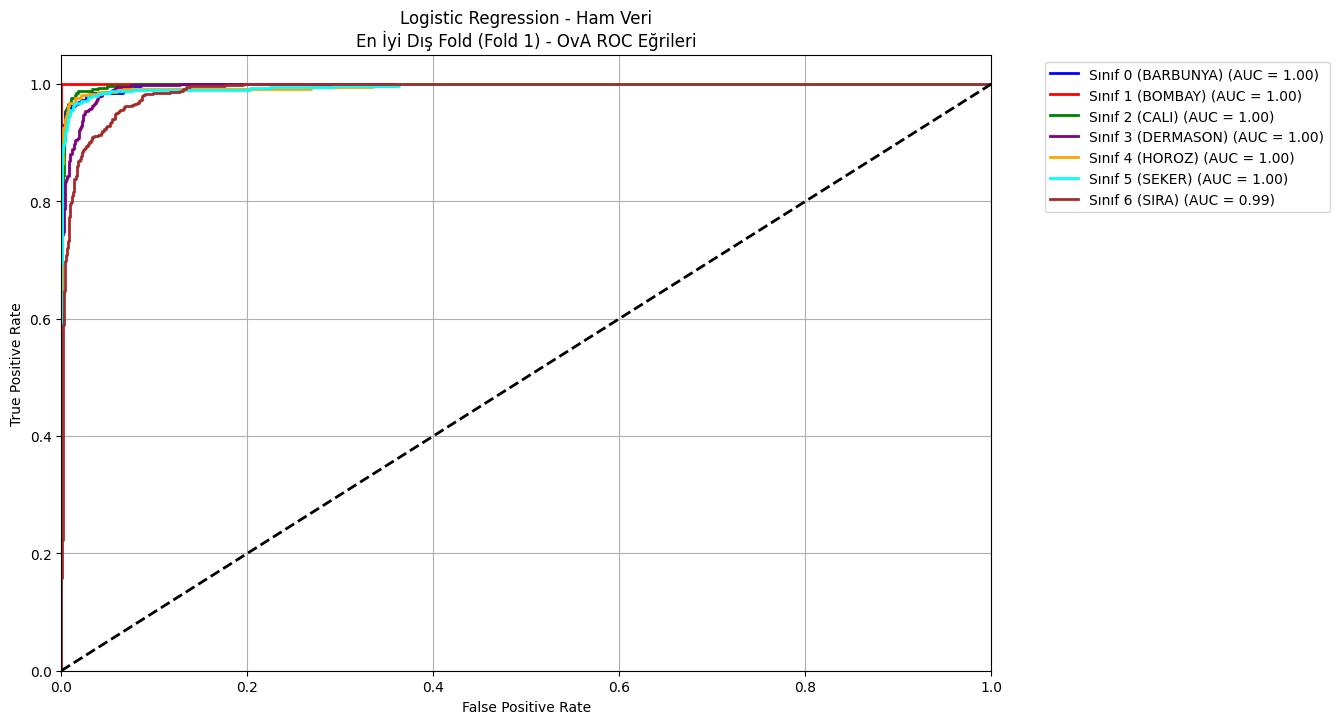


Logistic Regression (Ham Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9980
BOMBAY: 1.0000
CALI: 0.9984
DERMASON: 0.9957
HOROZ: 0.9961
SEKER: 0.9958
SIRA: 0.9891
Macro Avg AUC: 0.9962


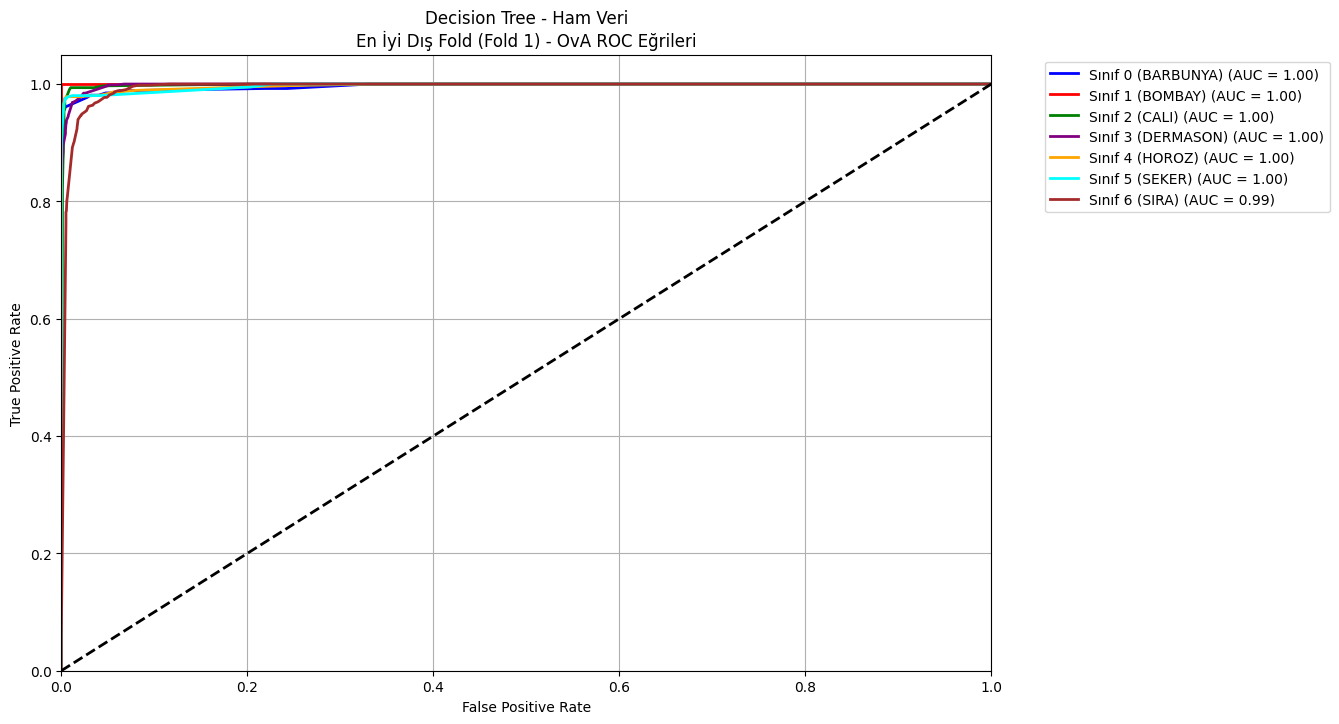


Decision Tree (Ham Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9965
BOMBAY: 1.0000
CALI: 0.9985
DERMASON: 0.9985
HOROZ: 0.9973
SEKER: 0.9970
SIRA: 0.9938
Macro Avg AUC: 0.9974


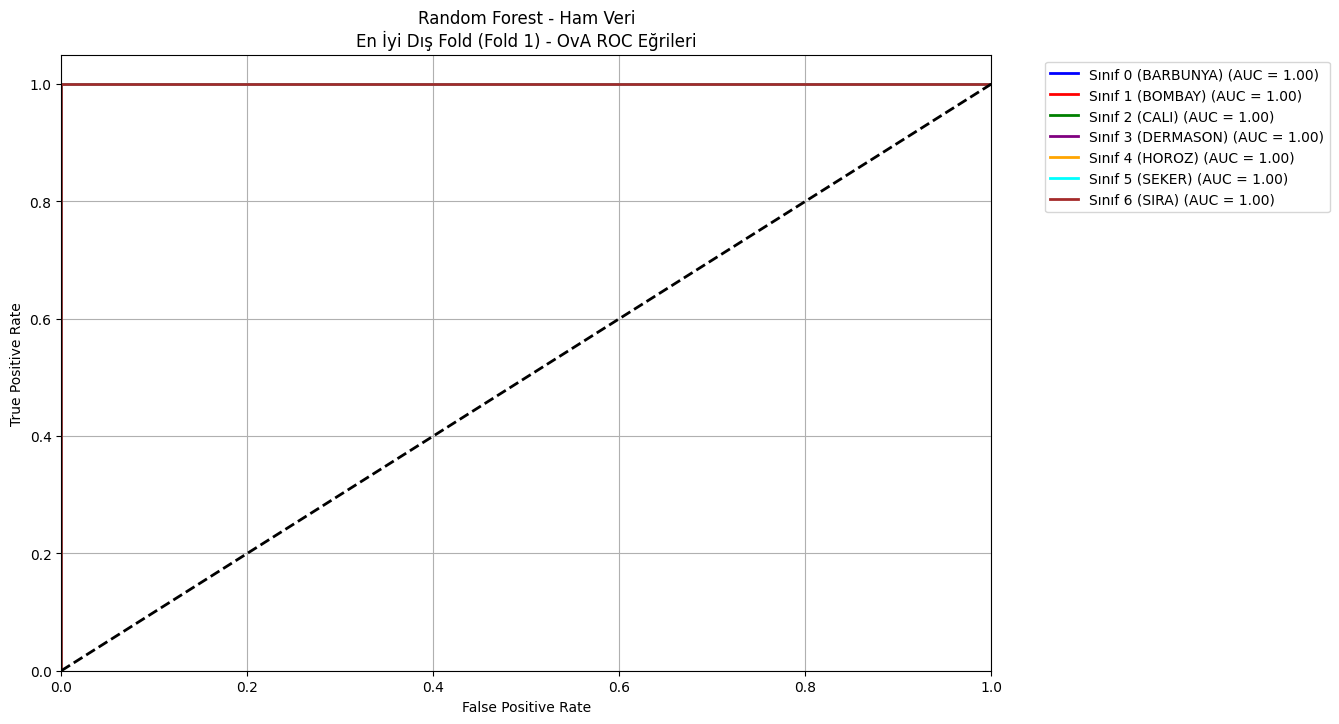


Random Forest (Ham Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 1.0000
BOMBAY: 1.0000
CALI: 1.0000
DERMASON: 1.0000
HOROZ: 1.0000
SEKER: 1.0000
SIRA: 1.0000
Macro Avg AUC: 1.0000


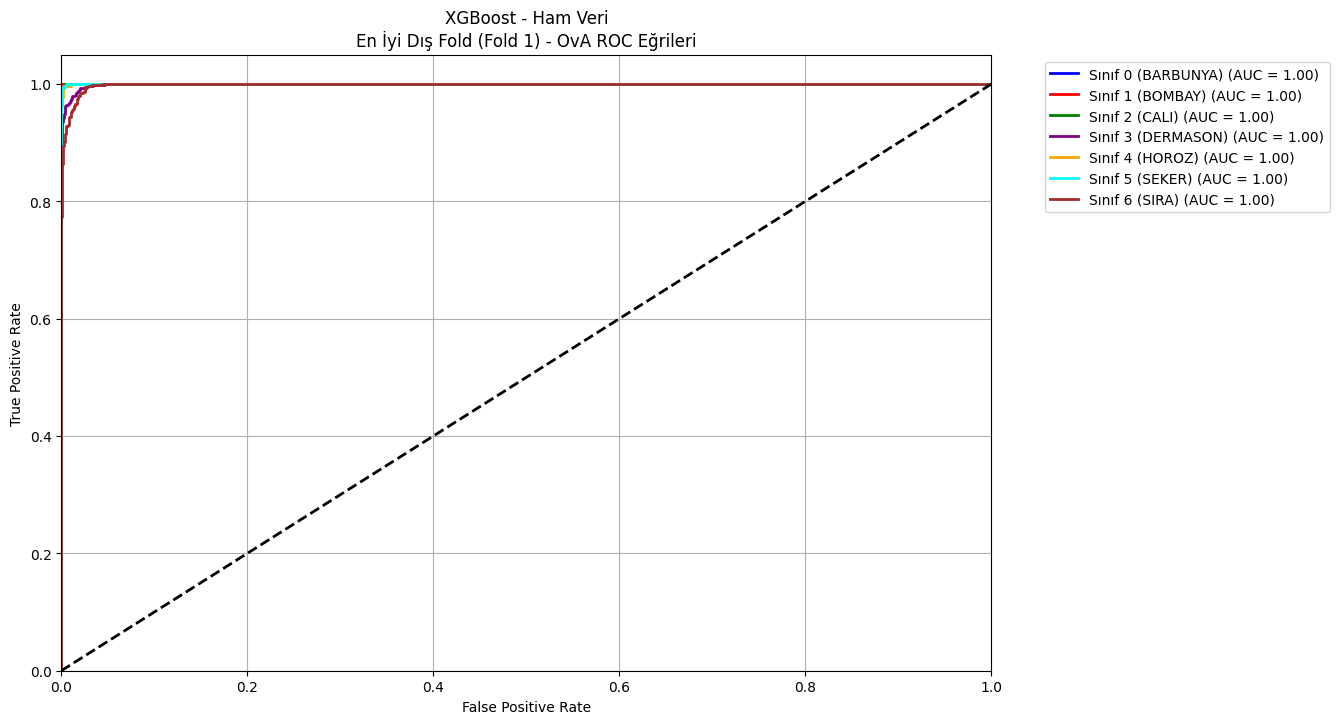


XGBoost (Ham Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 1.0000
BOMBAY: 1.0000
CALI: 1.0000
DERMASON: 0.9993
HOROZ: 0.9999
SEKER: 0.9999
SIRA: 0.9986
Macro Avg AUC: 0.9997


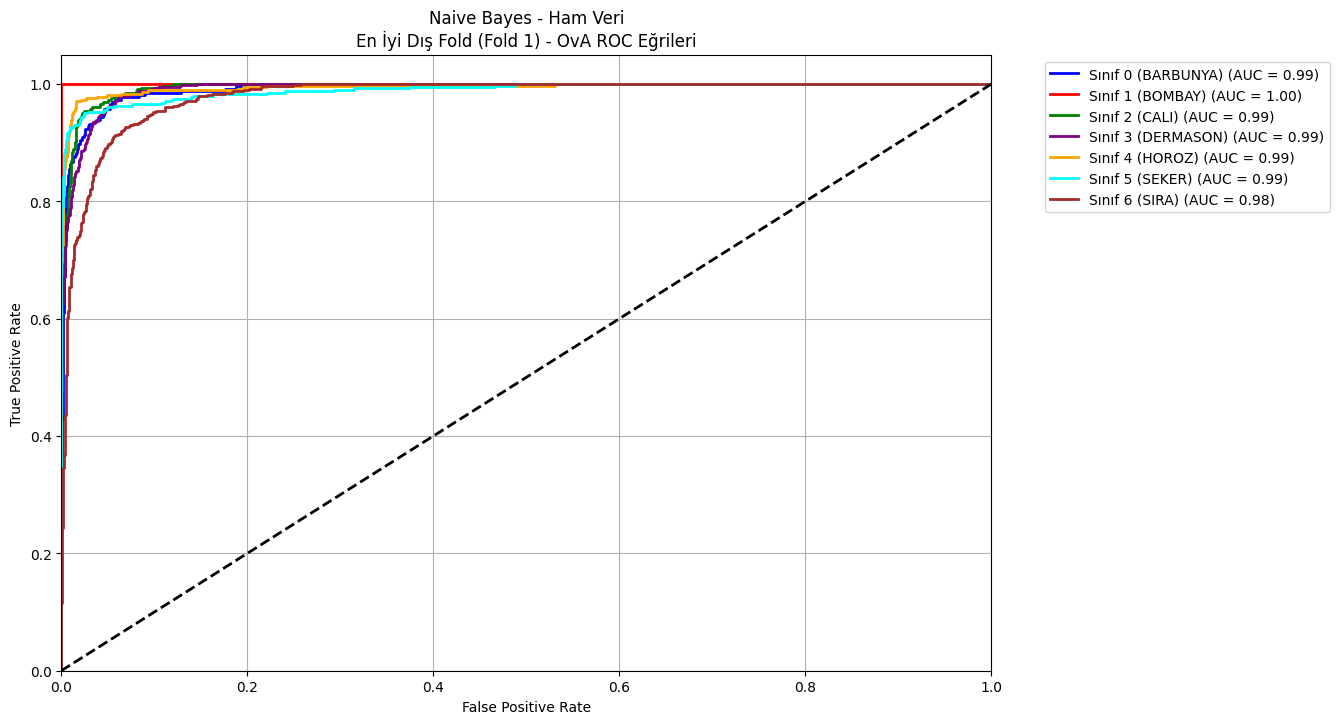


Naive Bayes (Ham Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9916
BOMBAY: 1.0000
CALI: 0.9943
DERMASON: 0.9921
HOROZ: 0.9946
SEKER: 0.9901
SIRA: 0.9803
Macro Avg AUC: 0.9919


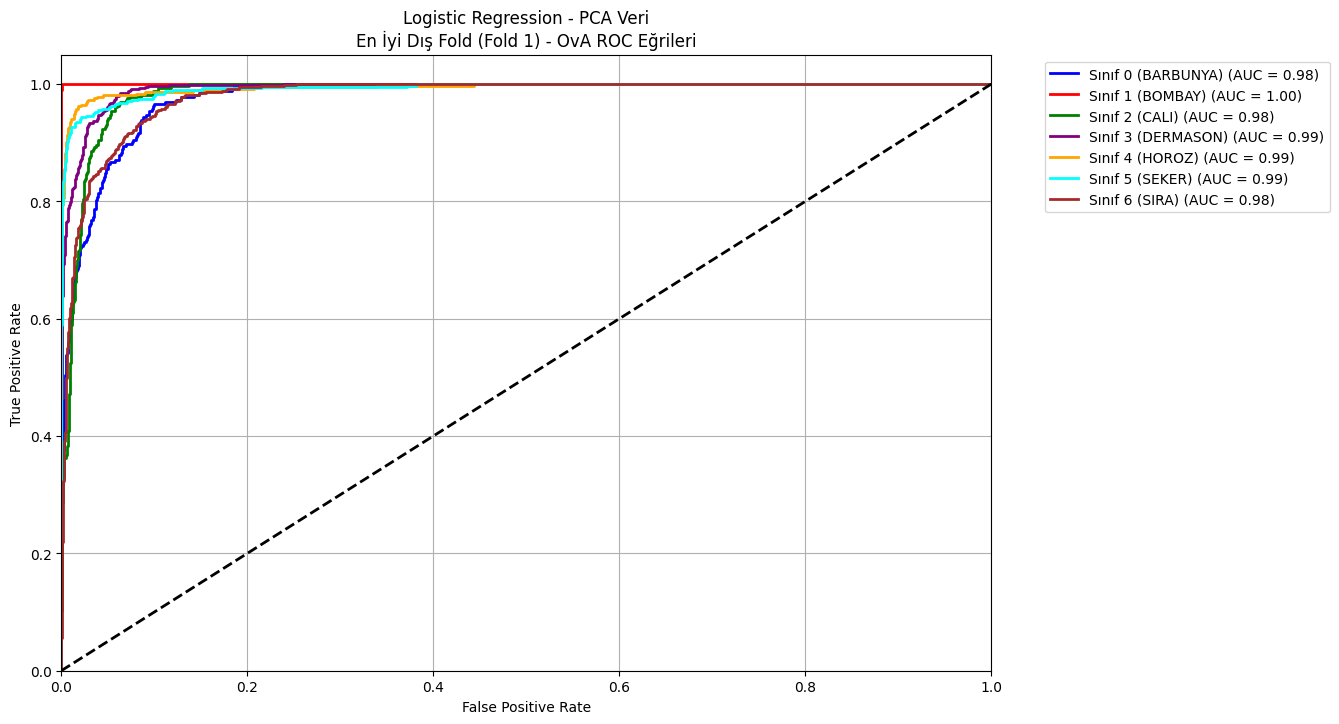


Logistic Regression (PCA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9783
BOMBAY: 1.0000
CALI: 0.9848
DERMASON: 0.9925
HOROZ: 0.9943
SEKER: 0.9930
SIRA: 0.9798
Macro Avg AUC: 0.9890


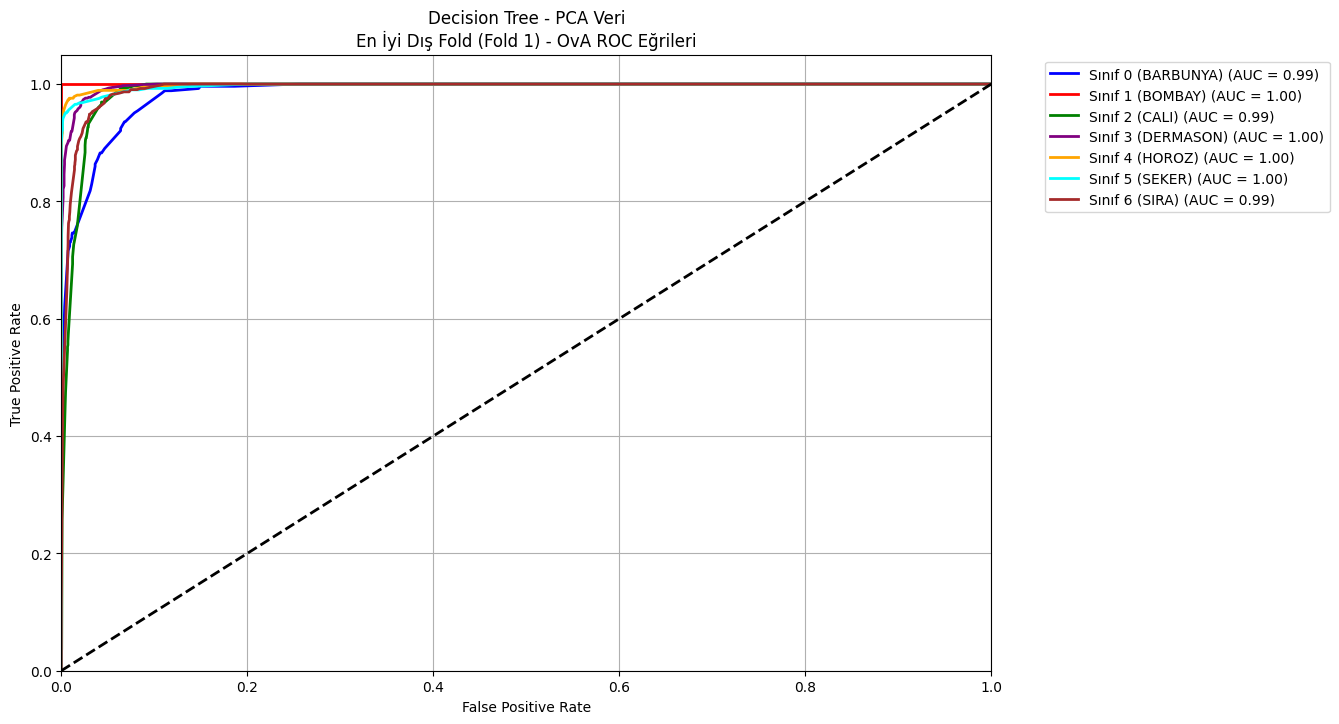


Decision Tree (PCA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9853
BOMBAY: 1.0000
CALI: 0.9894
DERMASON: 0.9974
HOROZ: 0.9984
SEKER: 0.9974
SIRA: 0.9924
Macro Avg AUC: 0.9943


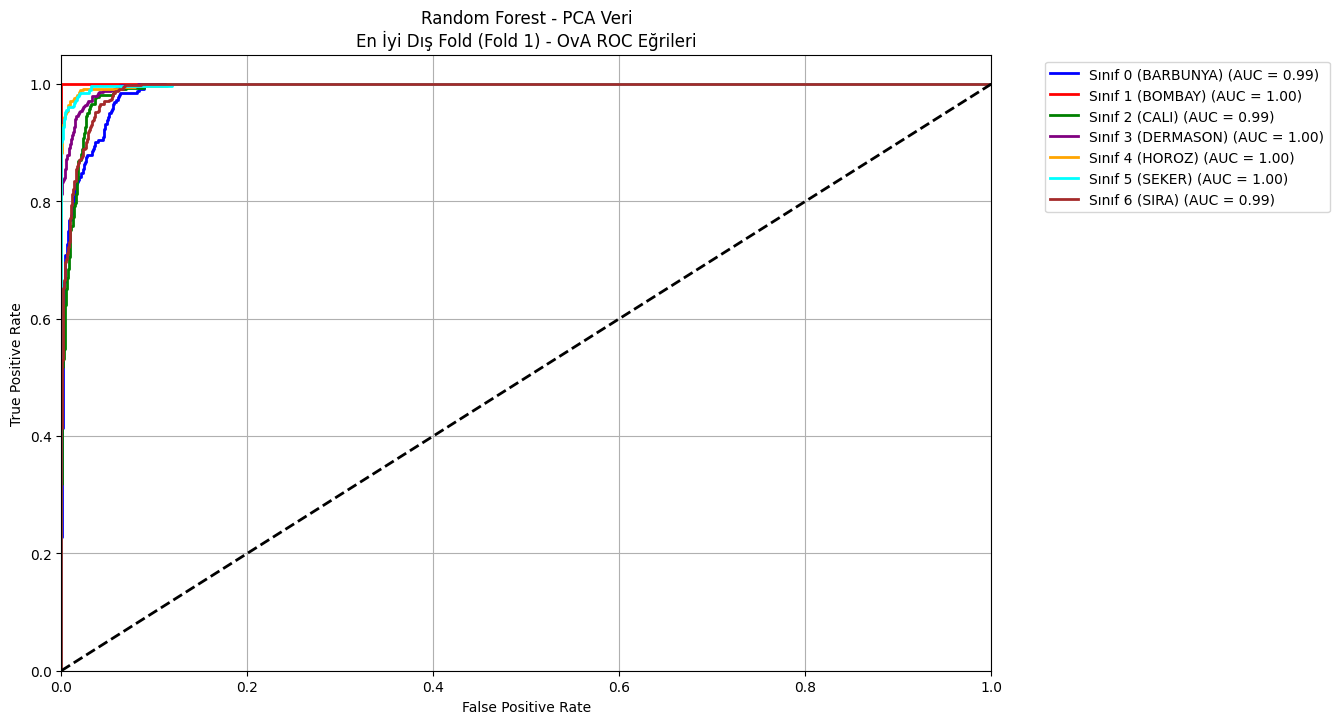


Random Forest (PCA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9903
BOMBAY: 1.0000
CALI: 0.9923
DERMASON: 0.9970
HOROZ: 0.9987
SEKER: 0.9987
SIRA: 0.9927
Macro Avg AUC: 0.9957


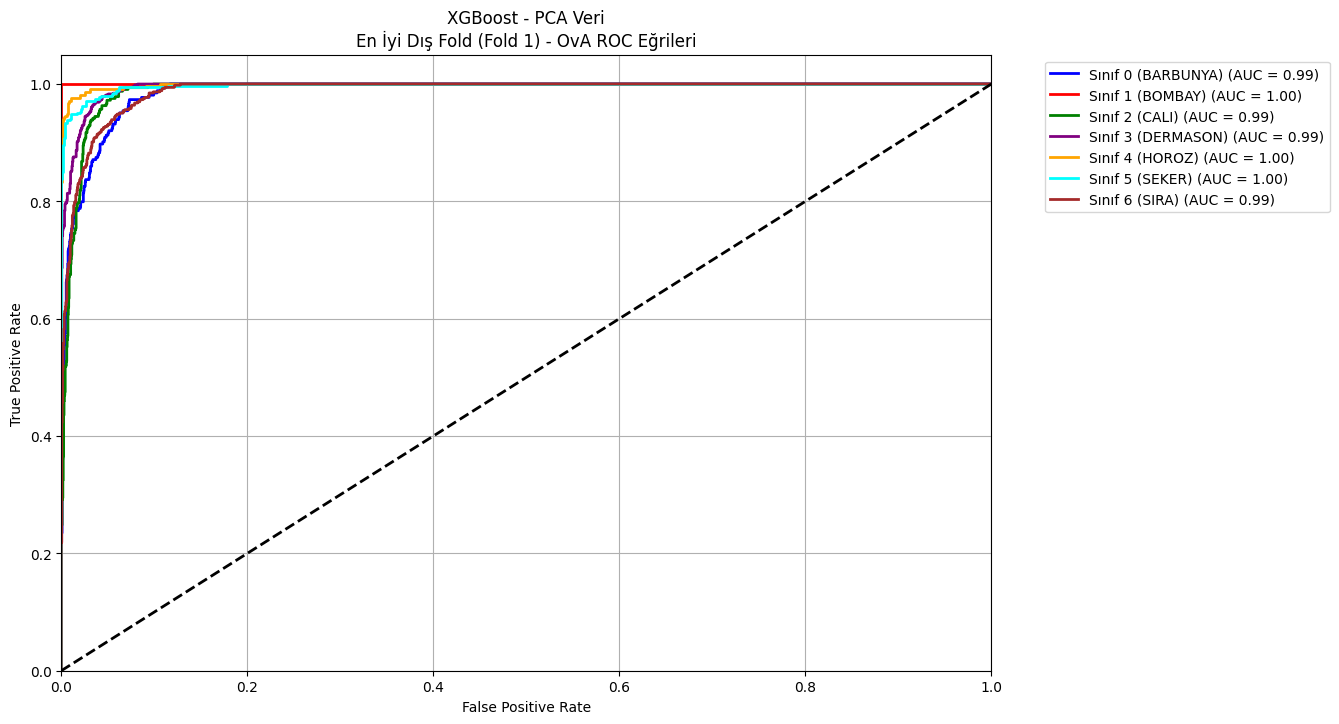


XGBoost (PCA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9872
BOMBAY: 1.0000
CALI: 0.9899
DERMASON: 0.9950
HOROZ: 0.9985
SEKER: 0.9972
SIRA: 0.9886
Macro Avg AUC: 0.9938


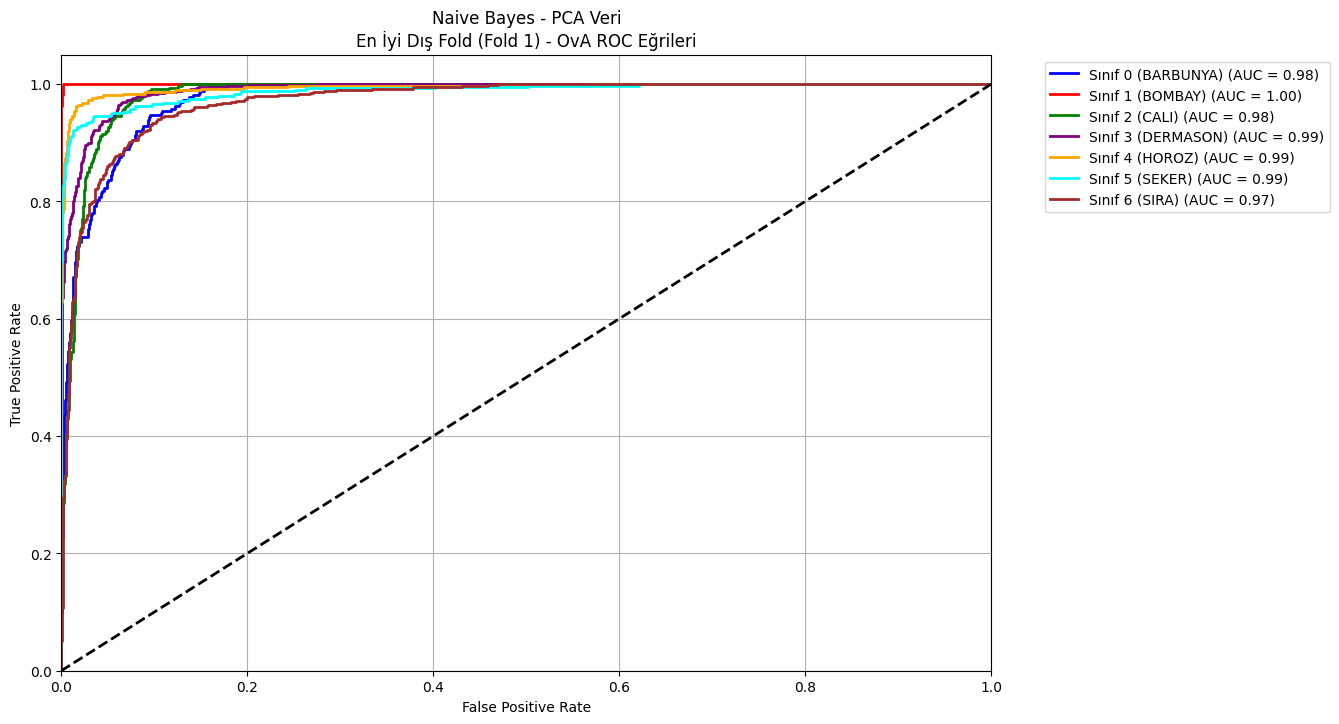


Naive Bayes (PCA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9775
BOMBAY: 0.9999
CALI: 0.9839
DERMASON: 0.9899
HOROZ: 0.9944
SEKER: 0.9887
SIRA: 0.9723
Macro Avg AUC: 0.9867


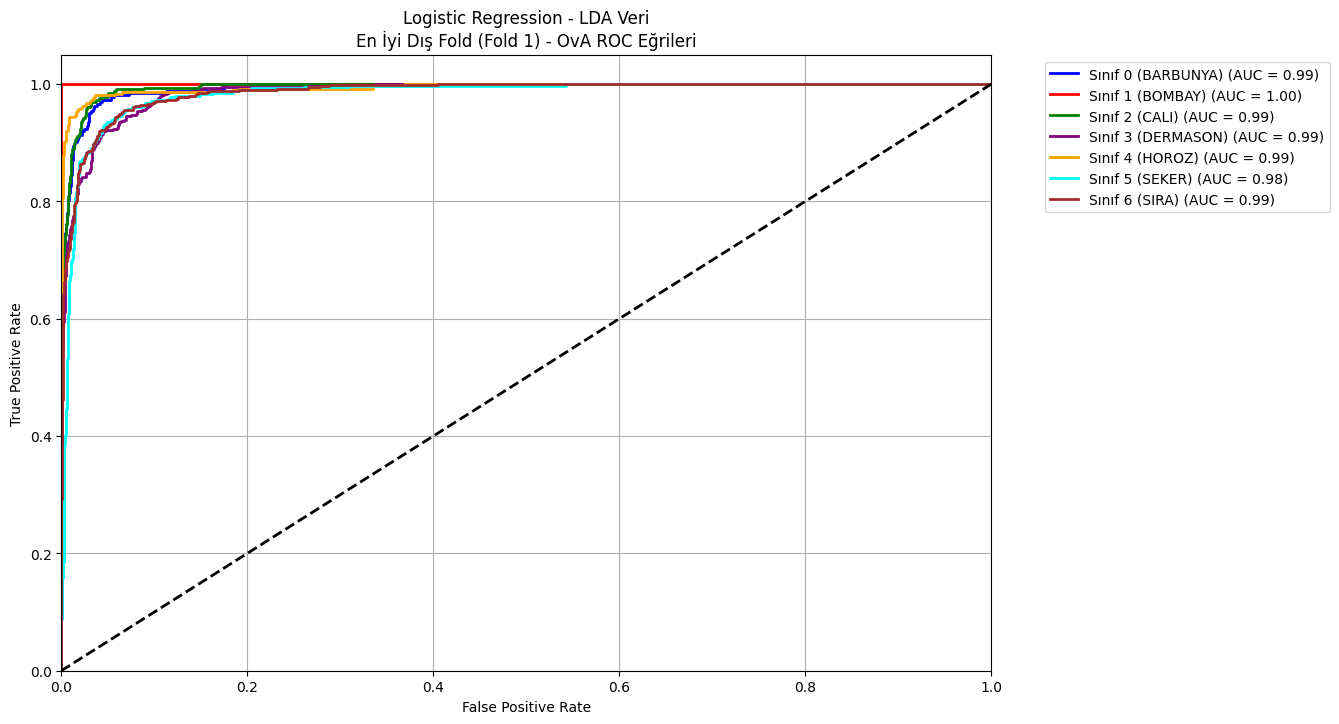


Logistic Regression (LDA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9927
BOMBAY: 1.0000
CALI: 0.9942
DERMASON: 0.9866
HOROZ: 0.9944
SEKER: 0.9835
SIRA: 0.9864
Macro Avg AUC: 0.9911


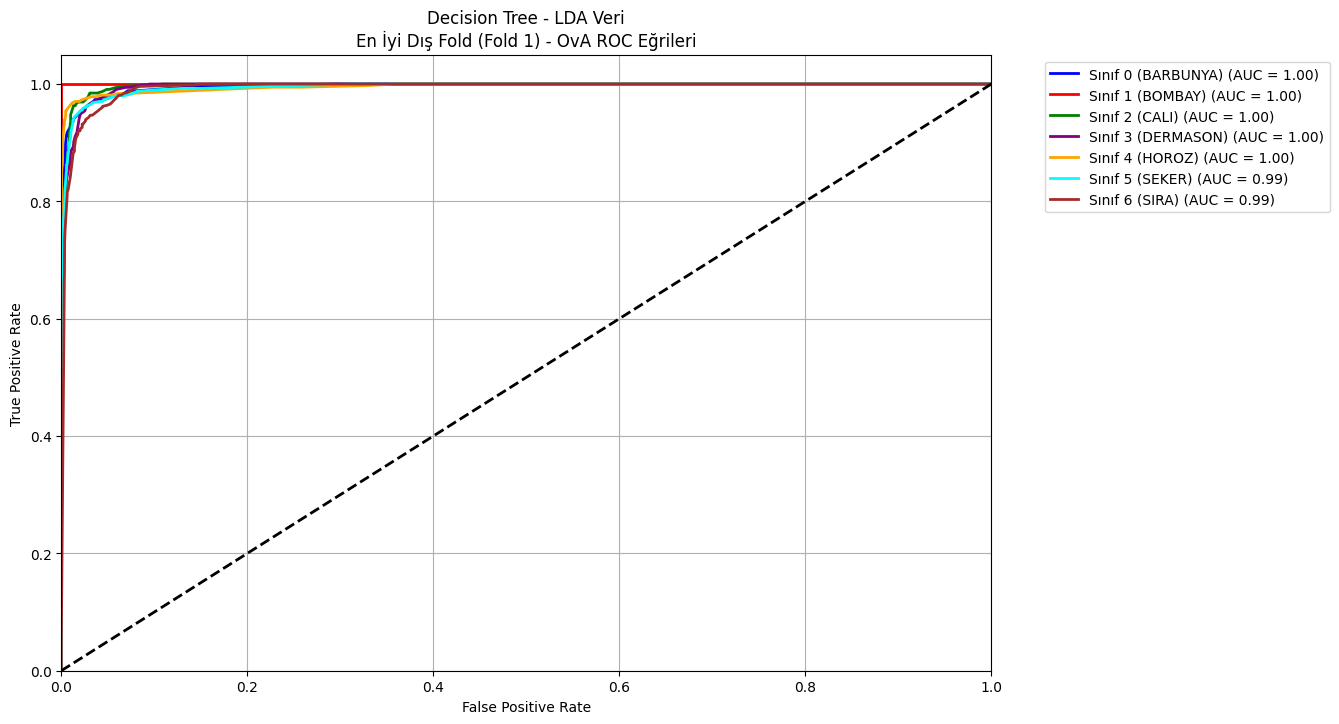


Decision Tree (LDA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9958
BOMBAY: 1.0000
CALI: 0.9965
DERMASON: 0.9959
HOROZ: 0.9958
SEKER: 0.9948
SIRA: 0.9932
Macro Avg AUC: 0.9960


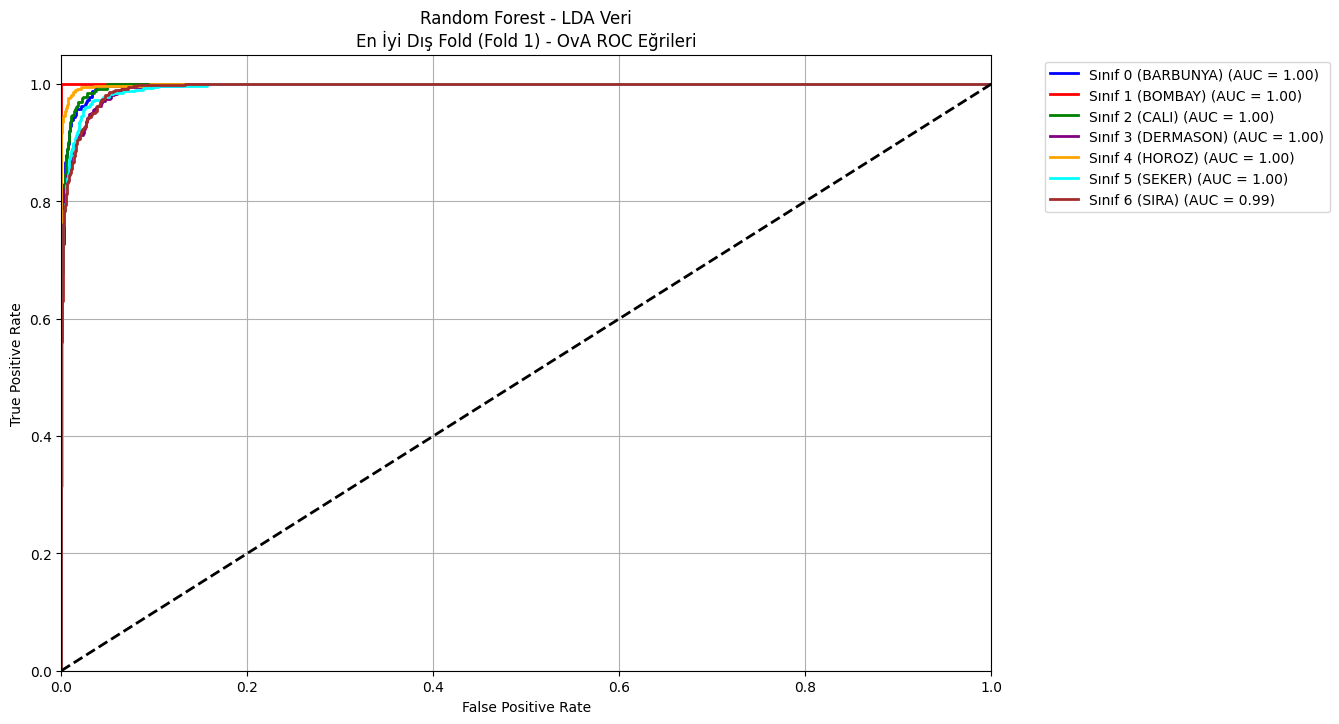


Random Forest (LDA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9972
BOMBAY: 1.0000
CALI: 0.9974
DERMASON: 0.9951
HOROZ: 0.9992
SEKER: 0.9951
SIRA: 0.9947
Macro Avg AUC: 0.9970


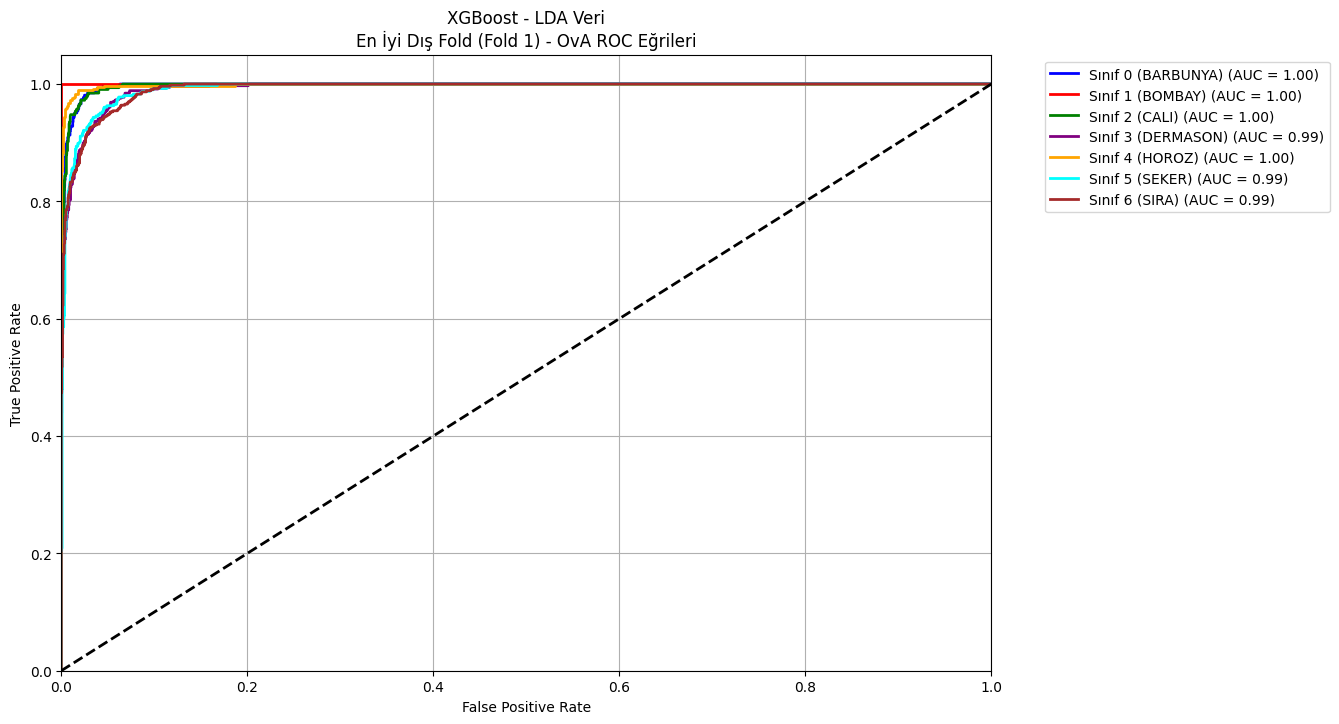


XGBoost (LDA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9973
BOMBAY: 1.0000
CALI: 0.9974
DERMASON: 0.9925
HOROZ: 0.9986
SEKER: 0.9924
SIRA: 0.9920
Macro Avg AUC: 0.9957


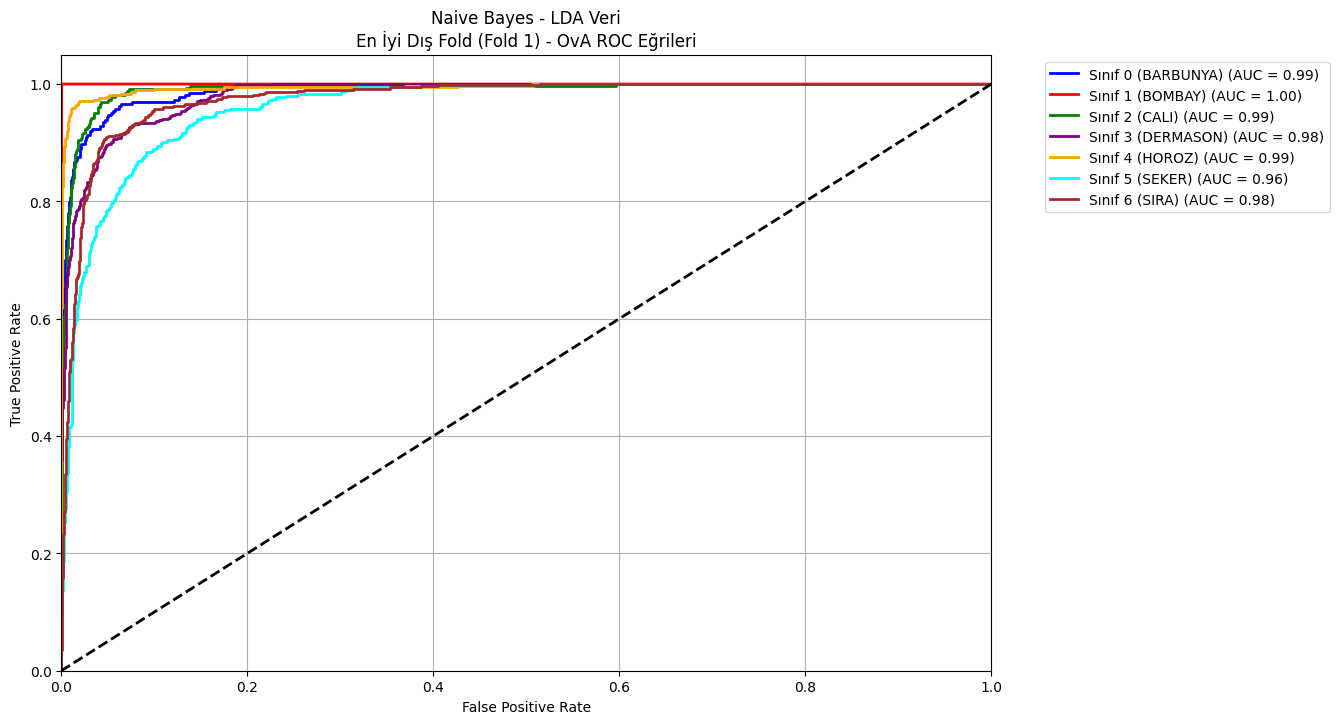


Naive Bayes (LDA Veri) - En İyi Fold 1 AUC Skorları:
BARBUNYA: 0.9897
BOMBAY: 0.9998
CALI: 0.9907
DERMASON: 0.9819
HOROZ: 0.9947
SEKER: 0.9627
SIRA: 0.9761
Macro Avg AUC: 0.9851


In [ ]:
def plot_ova_roc(X, y, best_model, data_name, model_name, class_names, outer_cv):

    # En iyi dış fold'u bul (en yüksek accuracy'li)
    best_fold_idx = np.argmax([res['Accuracy'] for res in results if res['Data'] == data_name and res['Model'] == model_name])

    # Dış fold'ları yeniden oluştur
    fold_generator = outer_cv.split(X, y)
    for fold, (train_idx, test_idx) in enumerate(fold_generator):
        if fold == best_fold_idx:
            X_test, y_test = X[test_idx], y[test_idx]
            break

    # OvA için gerekli ayarlar
    n_classes = len(class_names)
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    y_score = best_model.predict_proba(X_test)

    # ROC hesaplama
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Çizim
    plt.figure(figsize=(12, 8))
    colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Sınıf {0} ({1}) (AUC = {2:.2f})'.format(
                     i, class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - {data_name}\nEn İyi Dış Fold (Fold {best_fold_idx+1}) - OvA ROC Eğrileri')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

    # AUC skorlarını yazdır
    print(f"\n{model_name} ({data_name}) - En İyi Fold {best_fold_idx+1} AUC Skorları:")
    for i in range(n_classes):
        print(f"{class_names[i]}: {roc_auc[i]:.4f}")
    print(f"Macro Avg AUC: {np.mean(list(roc_auc.values())):.4f}")

# Ana işlem
for data_name in data_types.keys():
    for model_name in models_config.keys():
        # Nested CV sonuçlarından en iyi modeli al
        model_results = [res for res in results if res['Data'] == data_name and res['Model'] == model_name]
        if not model_results:
            continue

        # En iyi parametrelerle modeli yeniden oluştur
        best_params = eval(model_results[0]['Best_Params'])
        model = models_config[model_name]["model"].set_params(**best_params)

        # Tüm veriyi kullanarak fit et (veya nested CV'deki en iyi fold'un modelini kullan)
        model.fit(data_types[data_name], y_encoded)

        # ROC çiz
        plot_ova_roc(
            X=data_types[data_name],
            y=y_encoded,
            best_model=model,
            data_name=data_name,
            model_name=model_name,
            class_names=le.classes_,
            outer_cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        )